In [157]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [159]:
df.drop('Id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [160]:
# drop columns with 50% data missing

threshold = len(df) * 0.5
new_df = df.dropna(thresh=threshold, axis=1)


In [161]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [162]:
new_df.replace('?', np.NaN)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [163]:
null_vals = new_df.isnull().sum()
null_vals[null_vals > 0]

,0
LotFrontage,259
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81


In [164]:
# fill the columns having null rows with appropriate average of that column except for the categorical columns leave categorical columns because they contain some information
# coded as NA for not having some feature in housing and not as the value is missing so I will keep the categorical missing values as they are and if there are so many
# missing values I will be dropping those categorical column entirely

for column in new_df.columns:
  if new_df[column].dtype != 'object':
    new_df[column].fillna(new_df[column].mean(), inplace=True)


<ipython-input-164-e5b0649cceeb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column].fillna(new_df[column].mean(), inplace=True)


In [165]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

# Separate numerical features and target column
numerical_features = new_df.select_dtypes(include=np.number).drop('SalePrice', axis=1)
target_column = new_df['SalePrice']
categorical_features = new_df.select_dtypes(include='object')

# Standardize numerical features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with standardized features and target column
standardized_df = pd.DataFrame(standardized_features, columns=numerical_features.columns)
standardized_df['SalePrice'] = target_column

# Concatenate standardized features with categorical features
final_df = pd.concat([standardized_df, categorical_features], axis=1)


In [166]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [167]:
# ANOVA Test to find significant categorical variables with p-values < 0.05

import statsmodels.formula.api as smf

significant_columns = []
for column in final_df.select_dtypes(include='object').columns:
  # Create a formula for ANOVA test
  formula = f'SalePrice ~ C({column})'

  # Fit the model
  model = smf.ols(formula, data=final_df).fit()

  # Perform ANOVA test
  anova_table = sm.stats.anova_lm(model, typ=2)

  # Check if p-value is less than 0.05
  if anova_table['PR(>F)'].iloc[0] < 0.05:
    significant_columns.append((column, anova_table['PR(>F)'].iloc[0]))

print("Categorical columns with significant p-values (<0.05) in ANOVA test:")
print(significant_columns)


Categorical columns with significant p-values (<0.05) in ANOVA test:
[('MSZoning', 8.817633866272648e-35), ('LotShape', 6.447523852015111e-25), ('LandContour', 2.7422167521374613e-08), ('LotConfig', 3.1631674736044365e-06), ('Neighborhood', 1.5586002827688503e-225), ('Condition1', 8.904549416144104e-08), ('Condition2', 0.043425658360948464), ('BldgType', 2.0567364604967015e-10), ('HouseStyle', 3.376776535121486e-25), ('RoofStyle', 3.6535230471036686e-17), ('RoofMatl', 7.231444779976345e-08), ('Exterior1st', 2.5860887286413065e-43), ('Exterior2nd', 4.842185670692835e-43), ('ExterQual', 1.4395510967785439e-204), ('ExterCond', 5.106680608665449e-07), ('Foundation', 5.791895002233549e-91), ('BsmtQual', 9.610615106798098e-186), ('BsmtCond', 5.136900937702552e-09), ('BsmtExposure', 1.022670629182762e-42), ('BsmtFinType1', 1.8077310066872957e-63), ('BsmtFinType2', 0.01941008969023767), ('Heating', 0.0007534721064444824), ('HeatingQC', 2.667062092105115e-67), ('CentralAir', 1.8095061559266183e

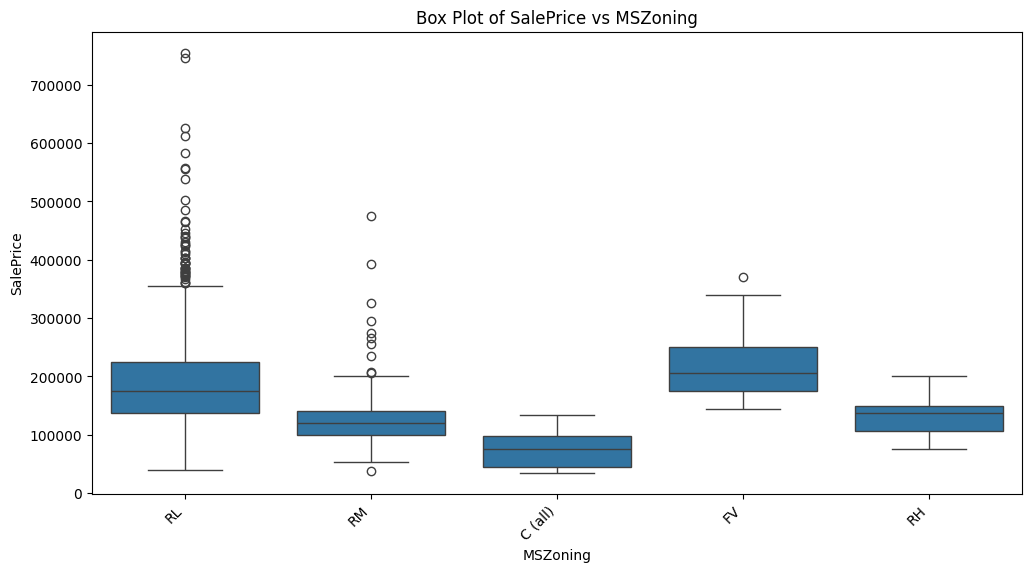

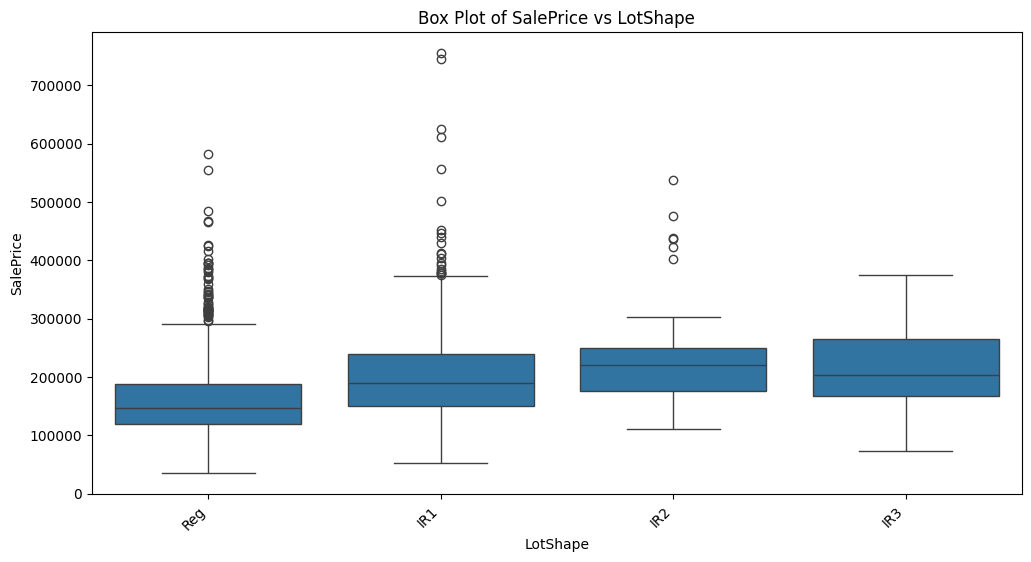

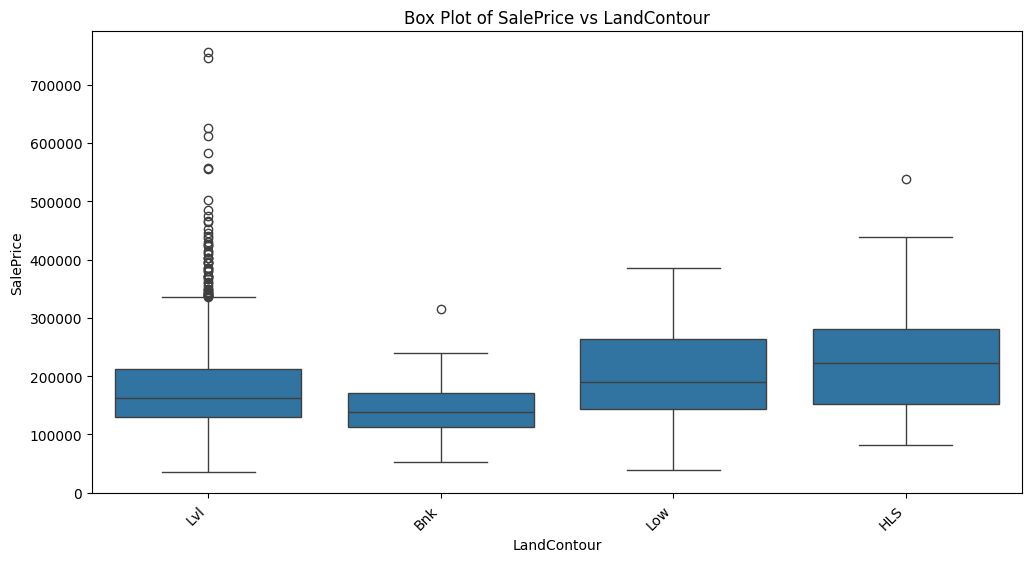

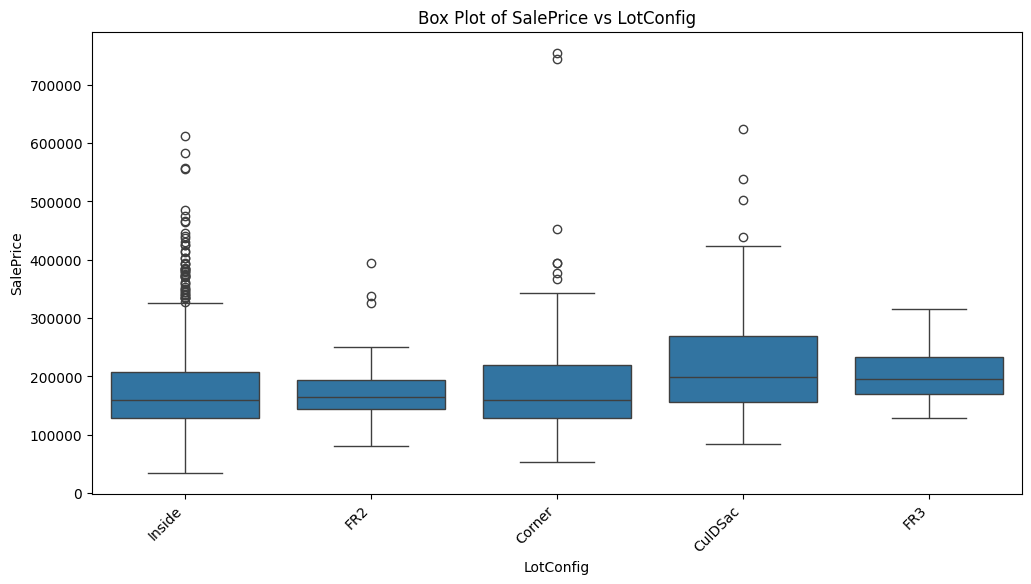

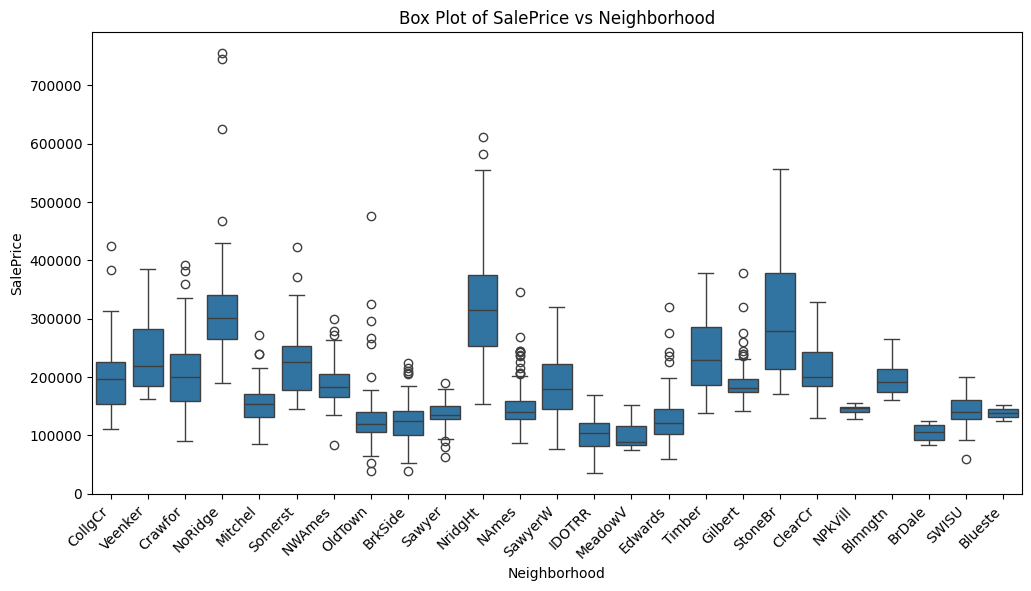

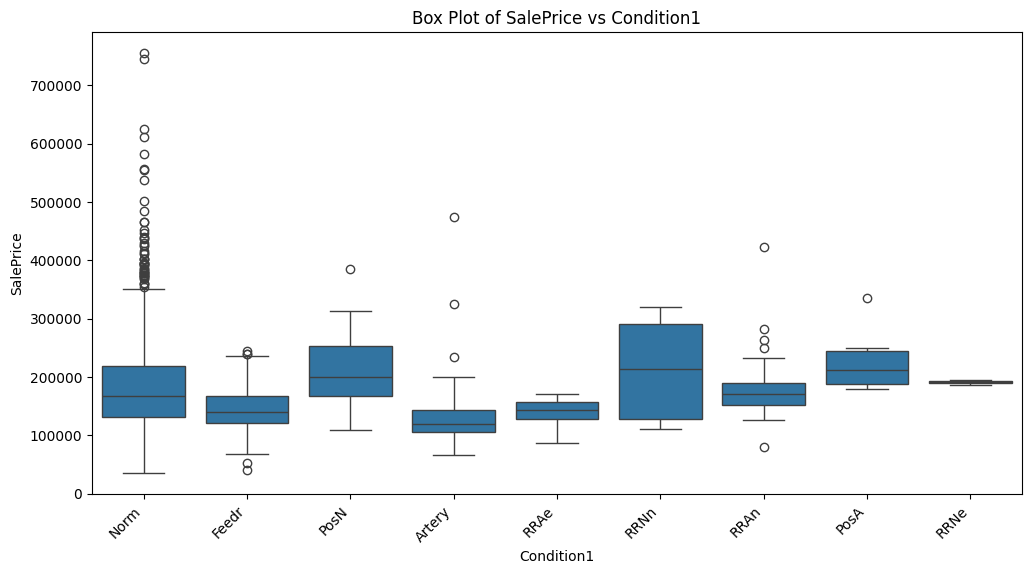

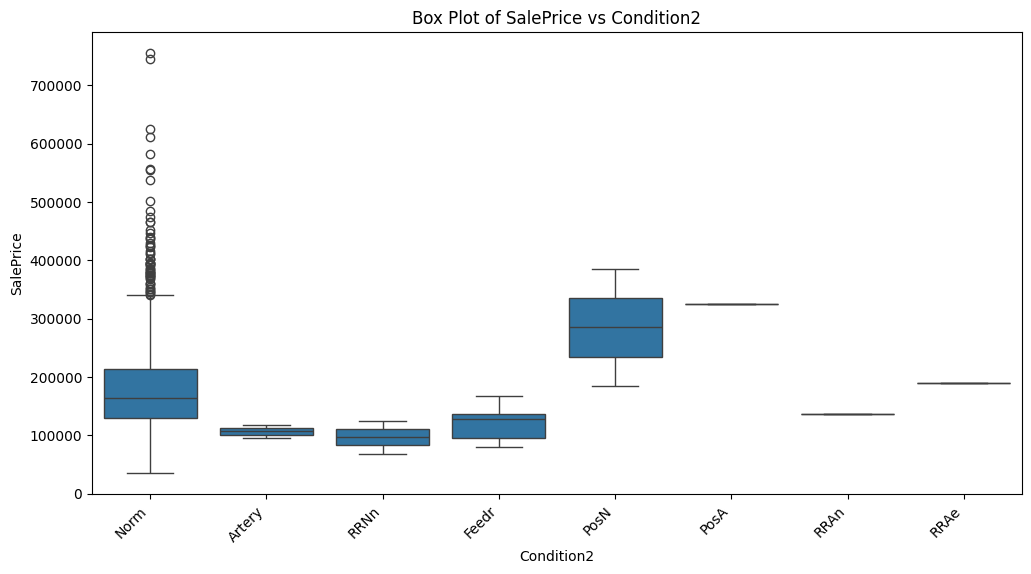

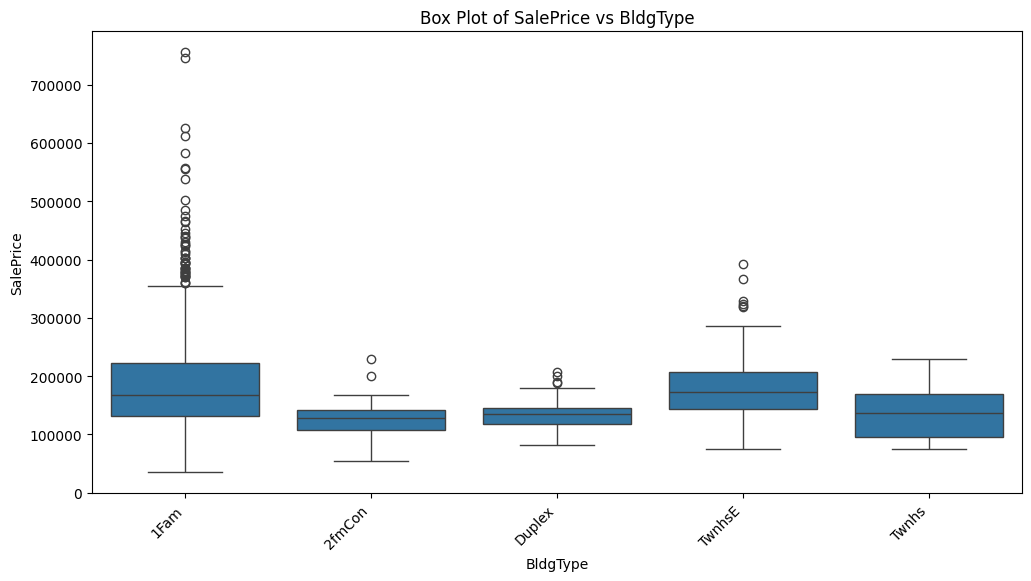

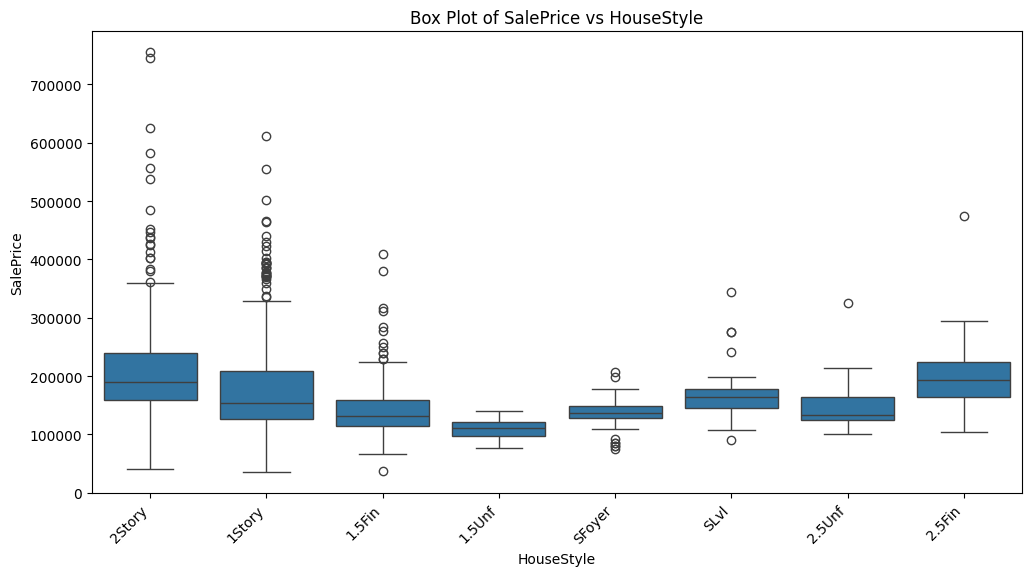

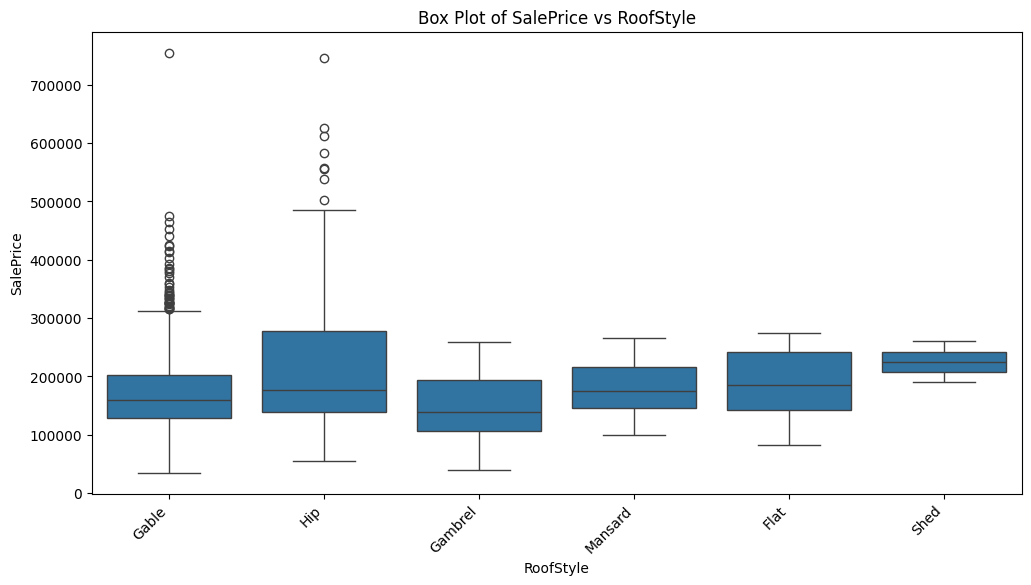

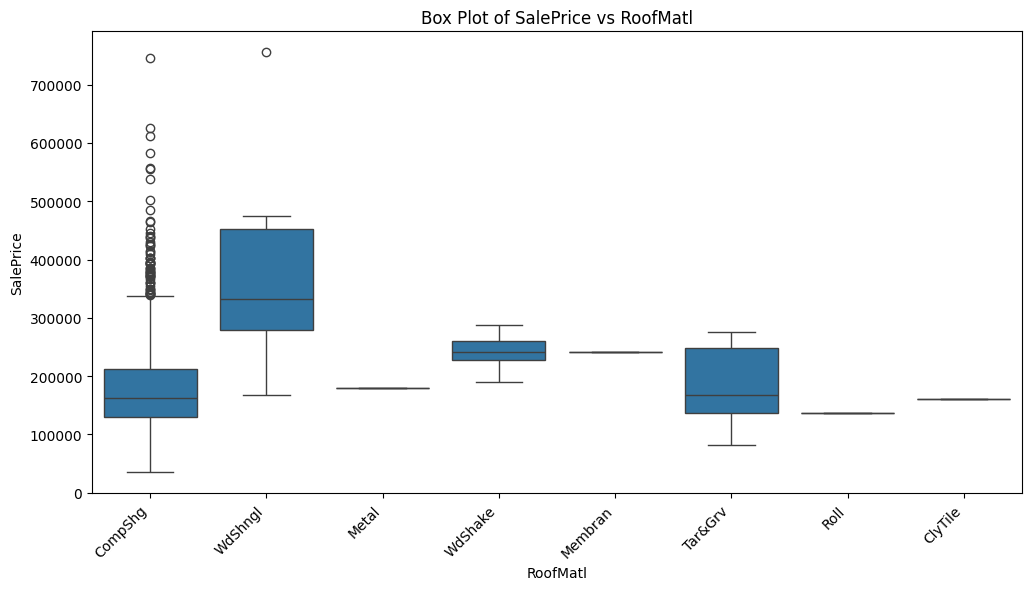

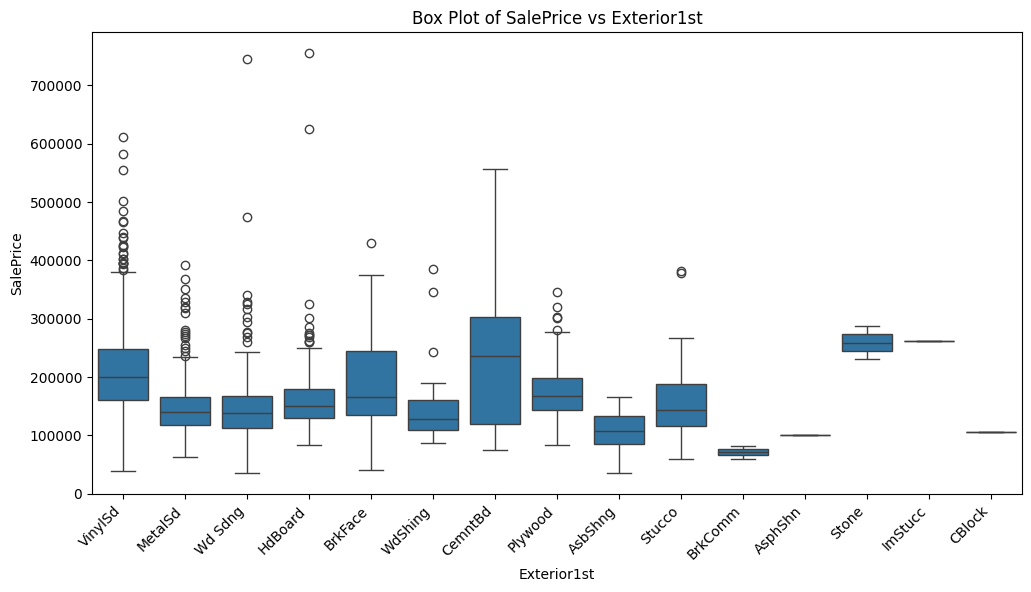

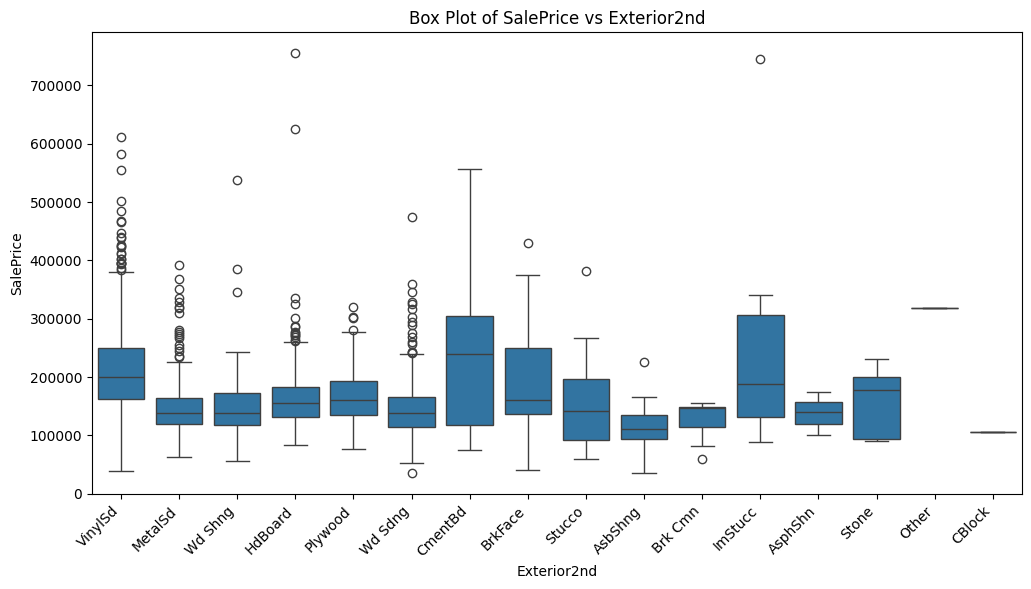

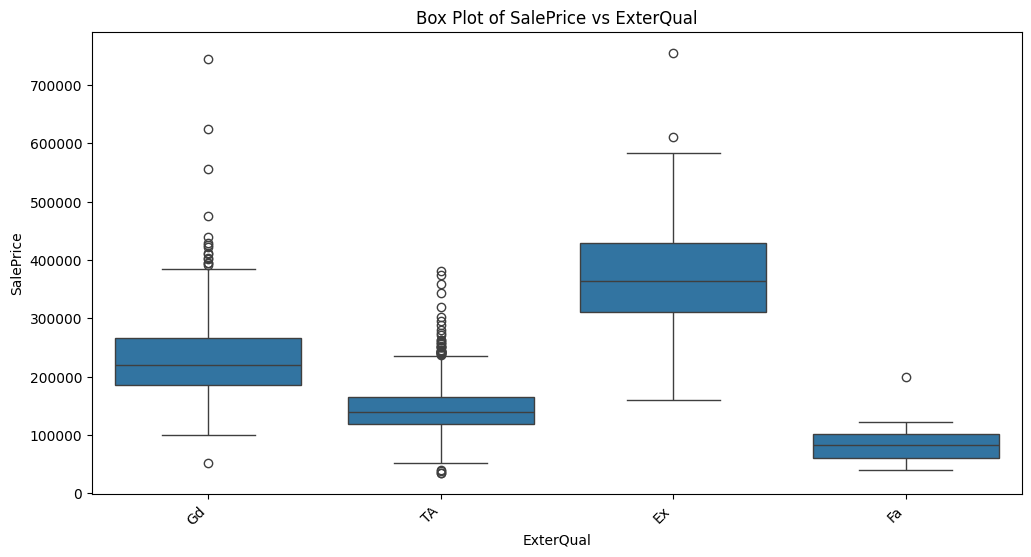

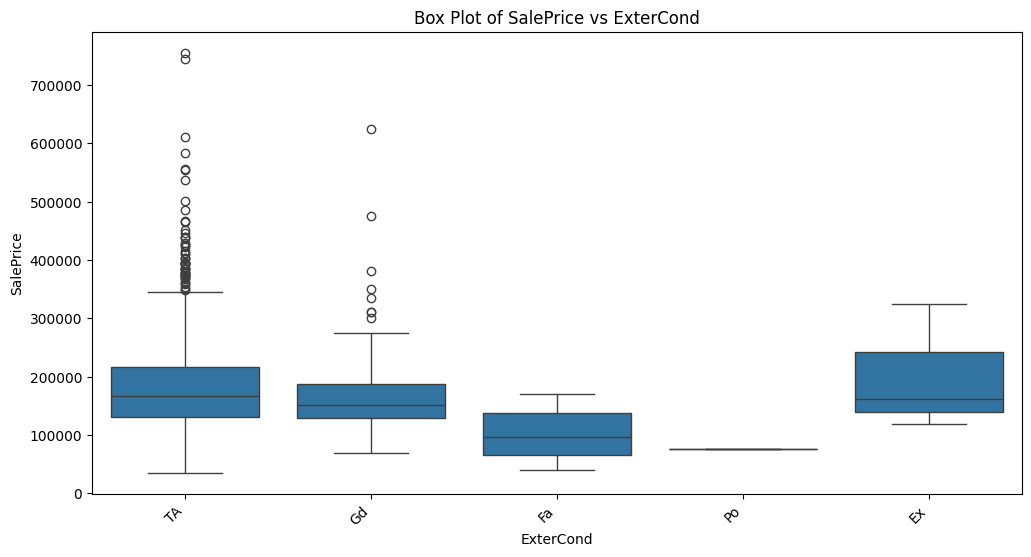

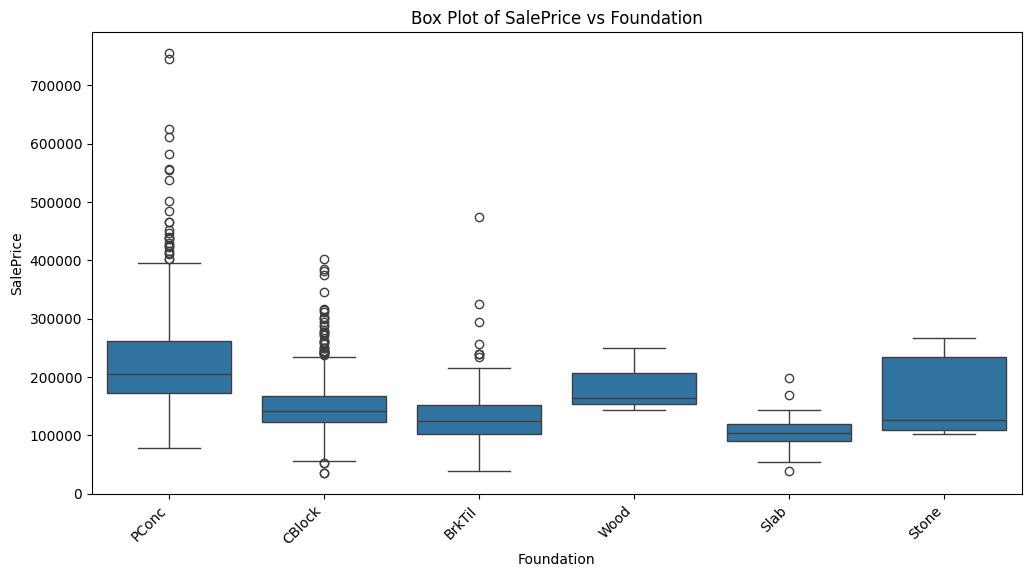

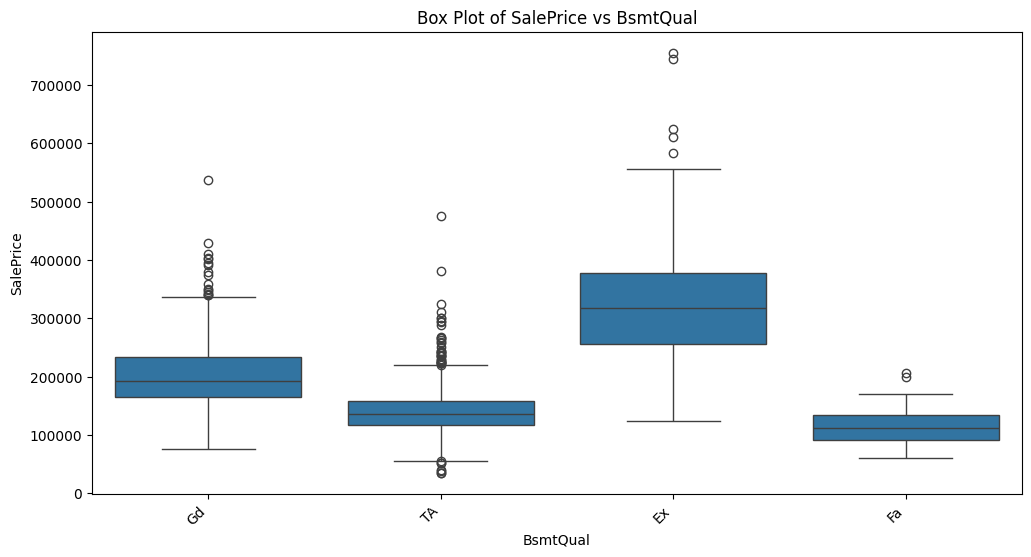

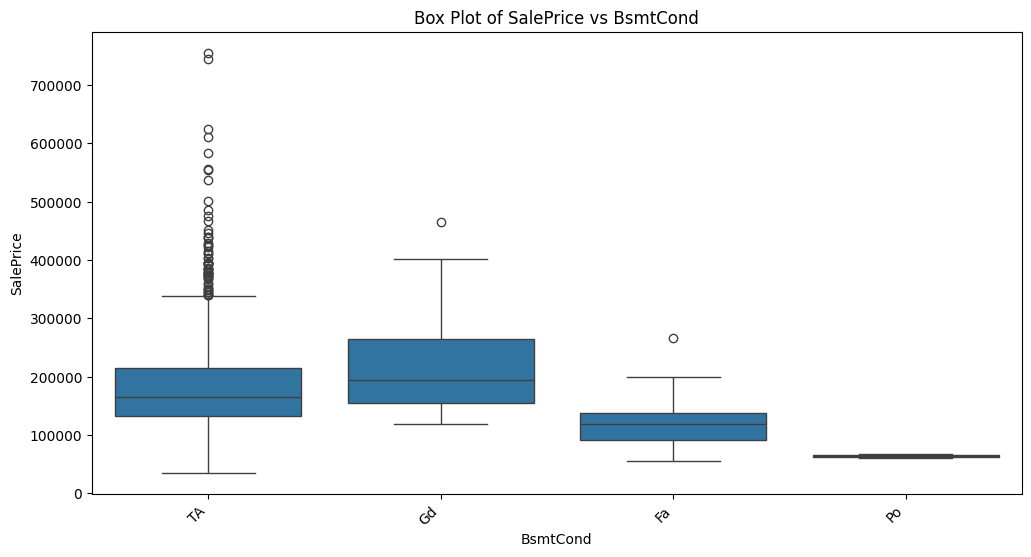

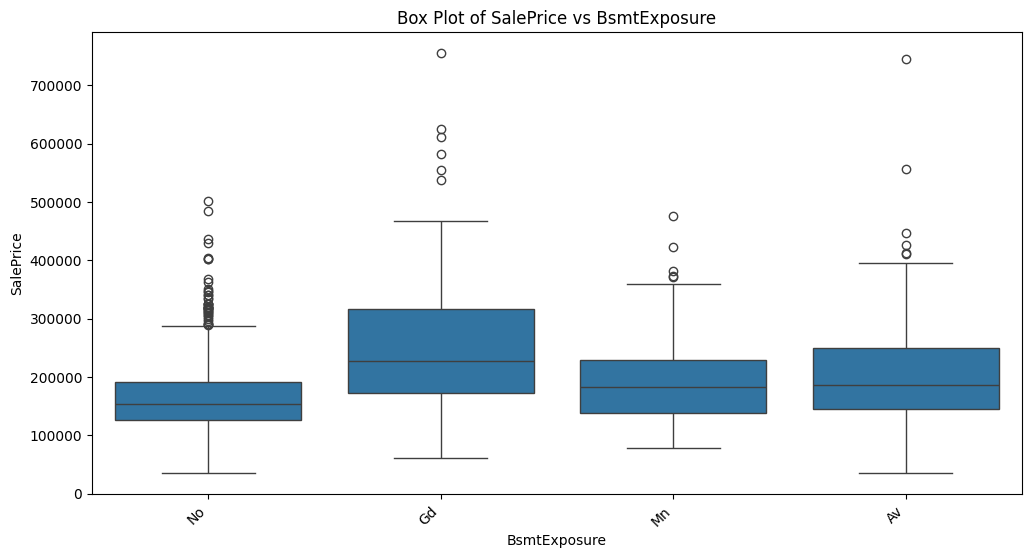

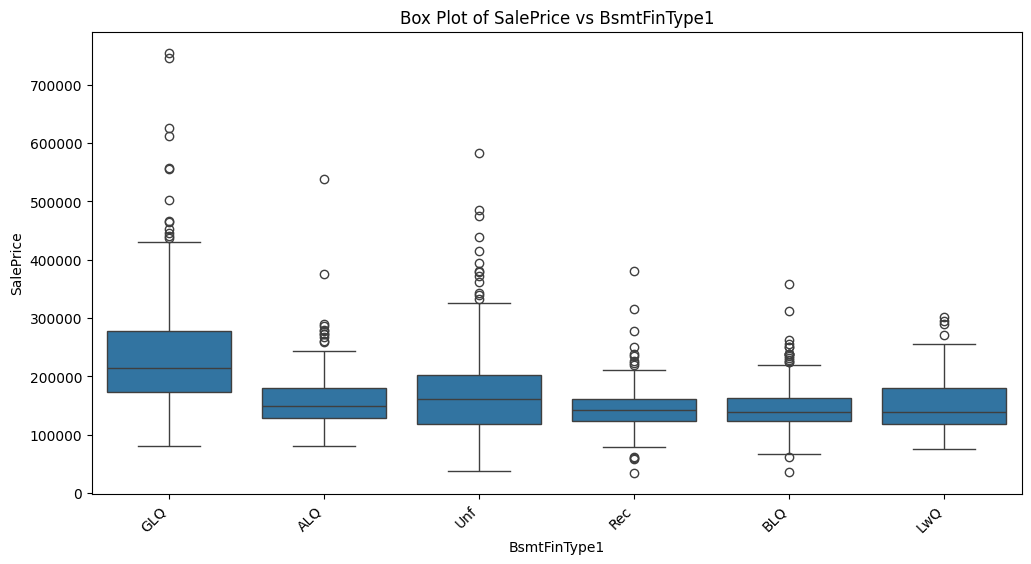

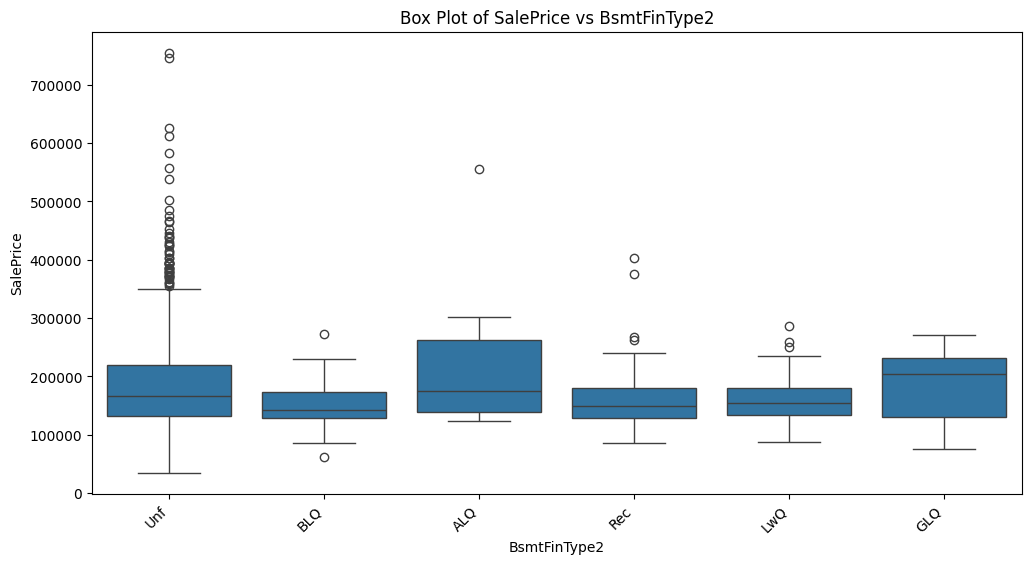

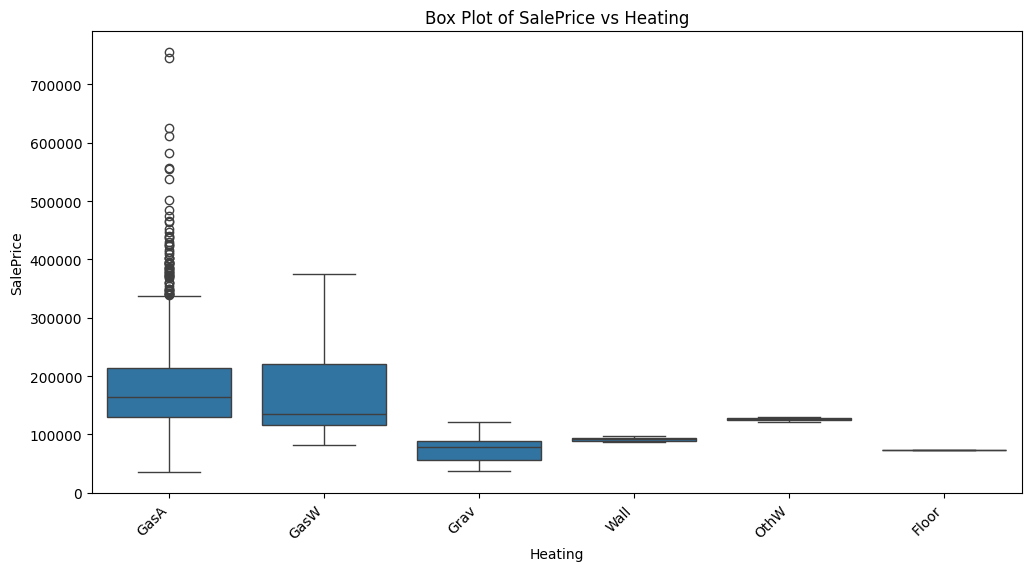

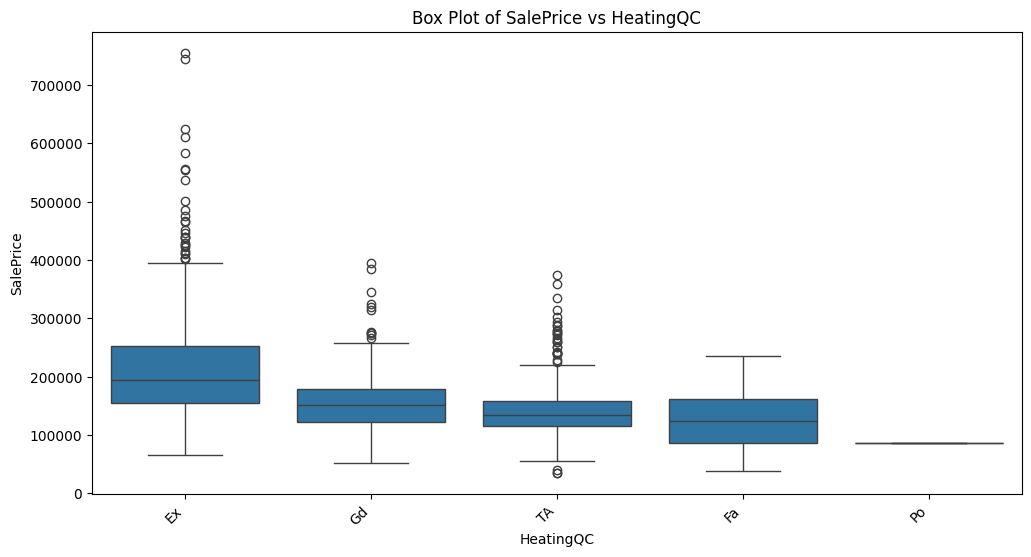

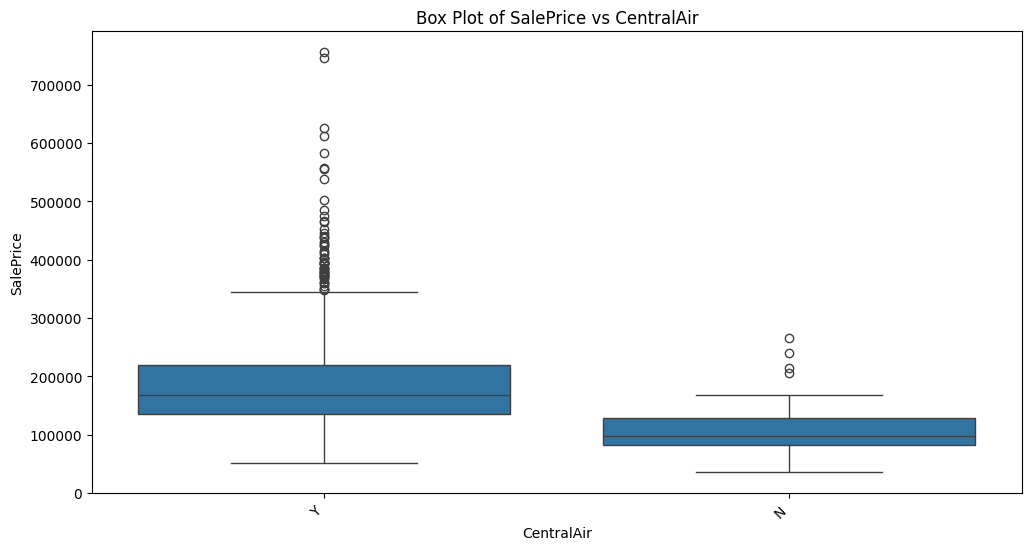

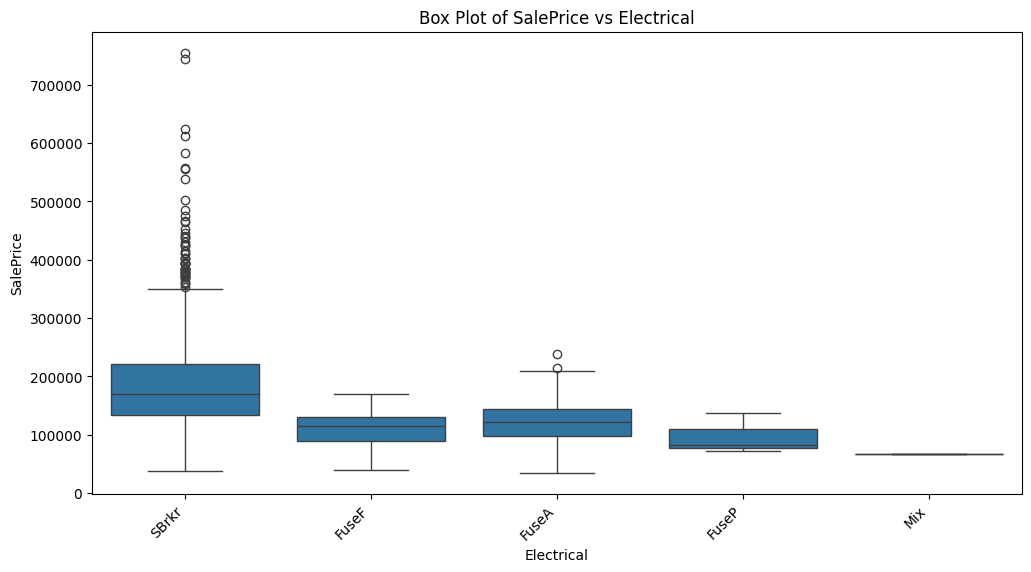

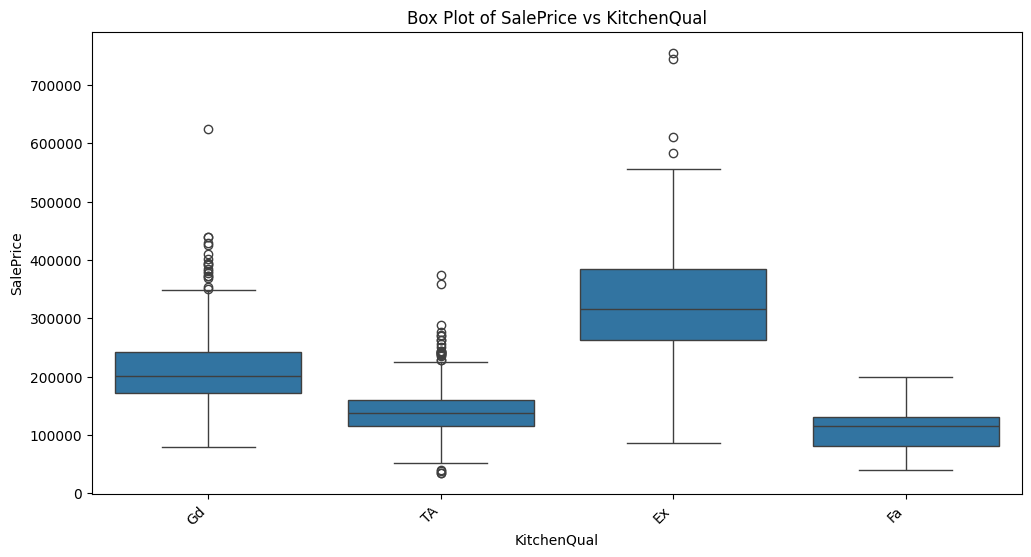

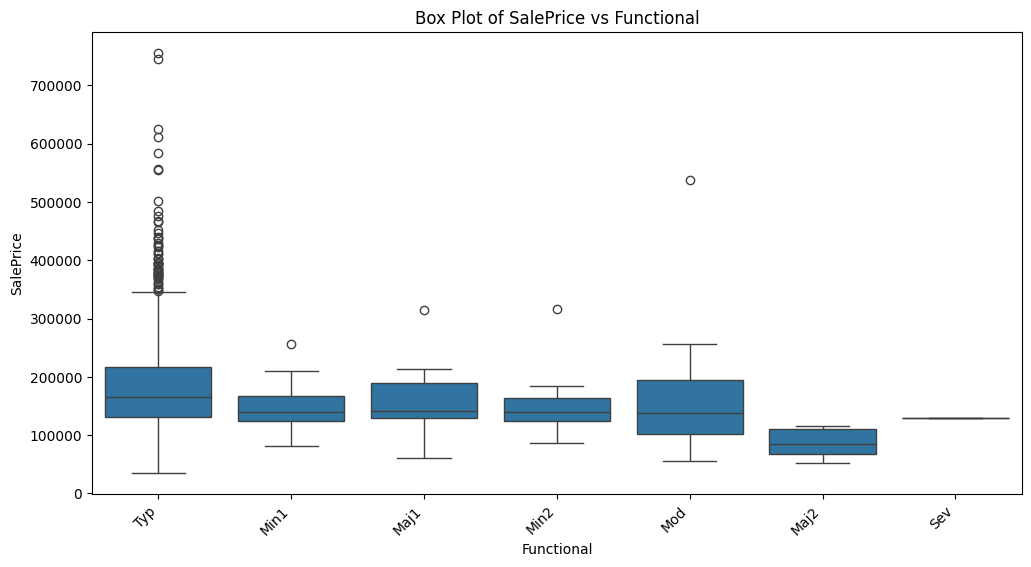

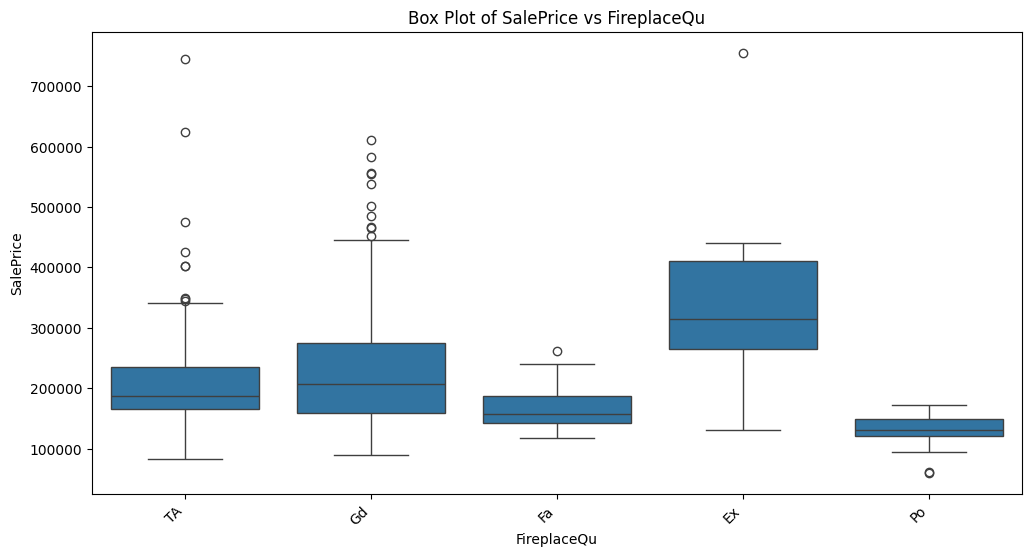

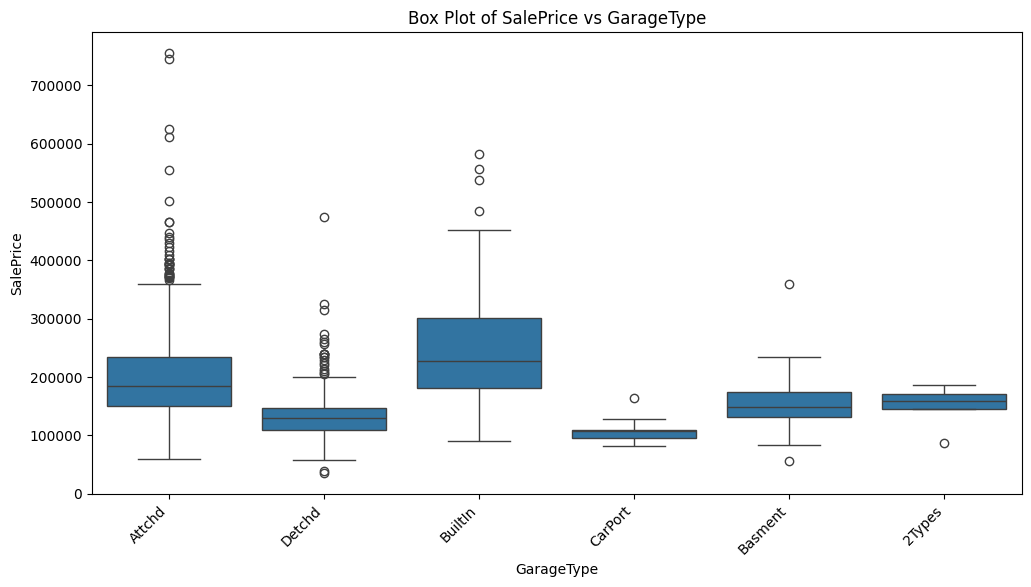

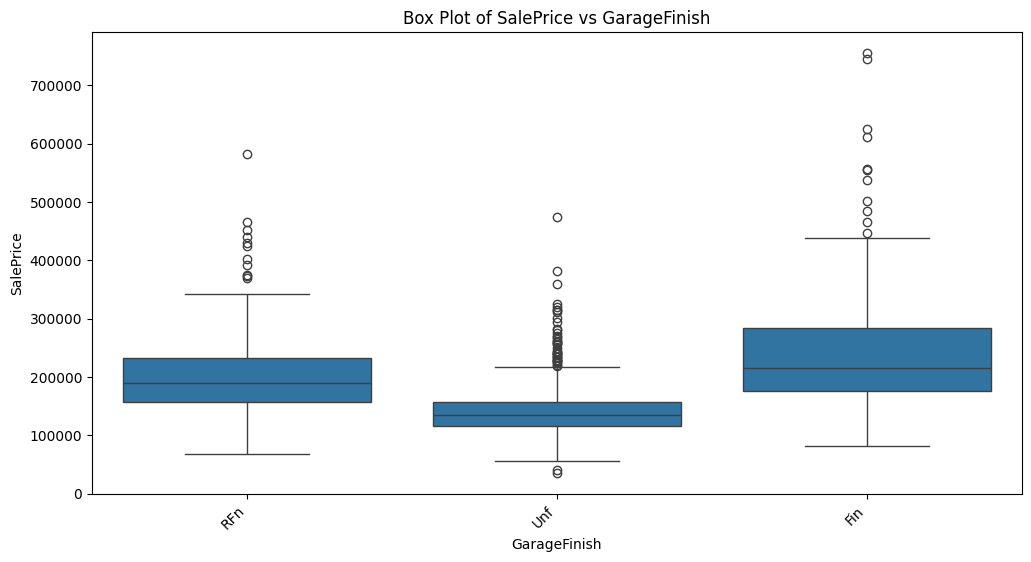

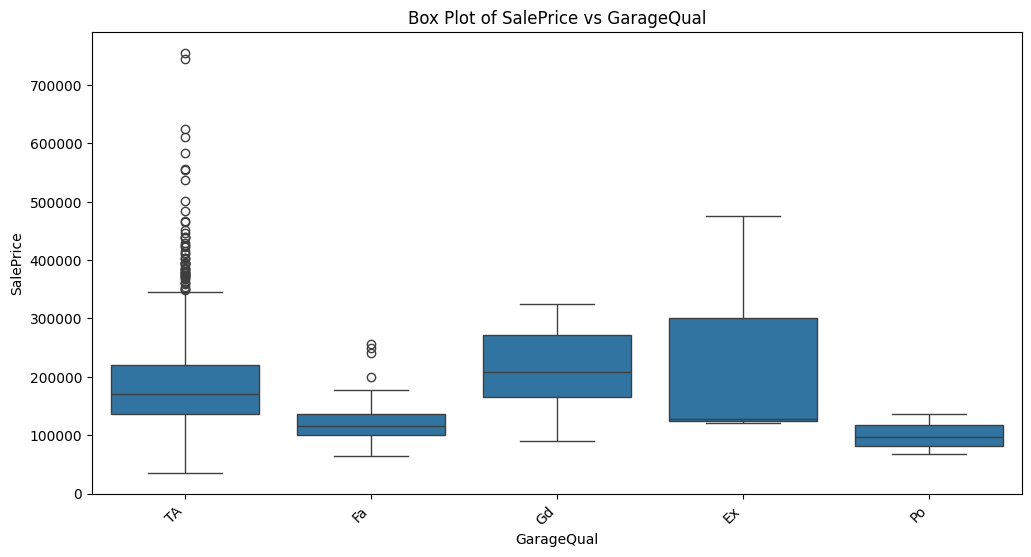

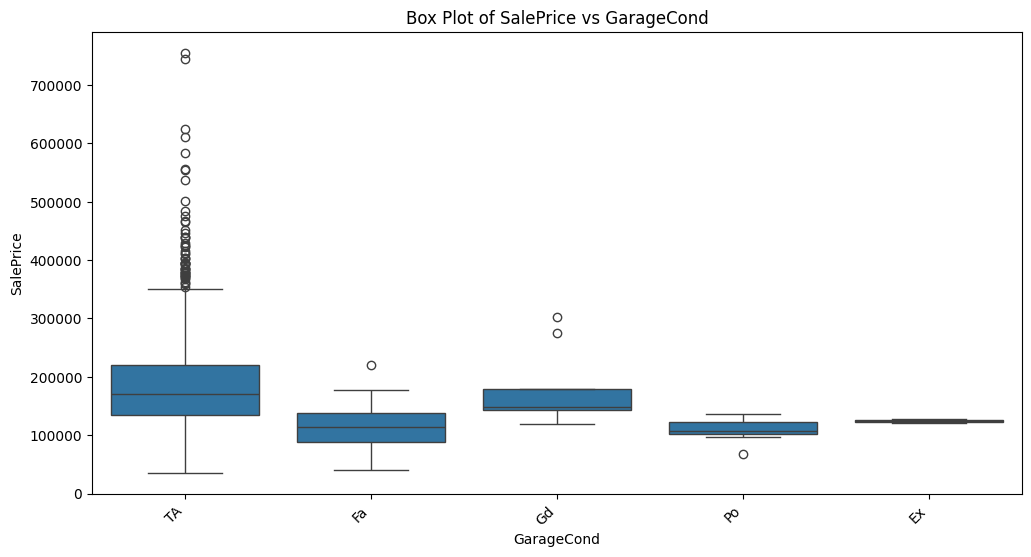

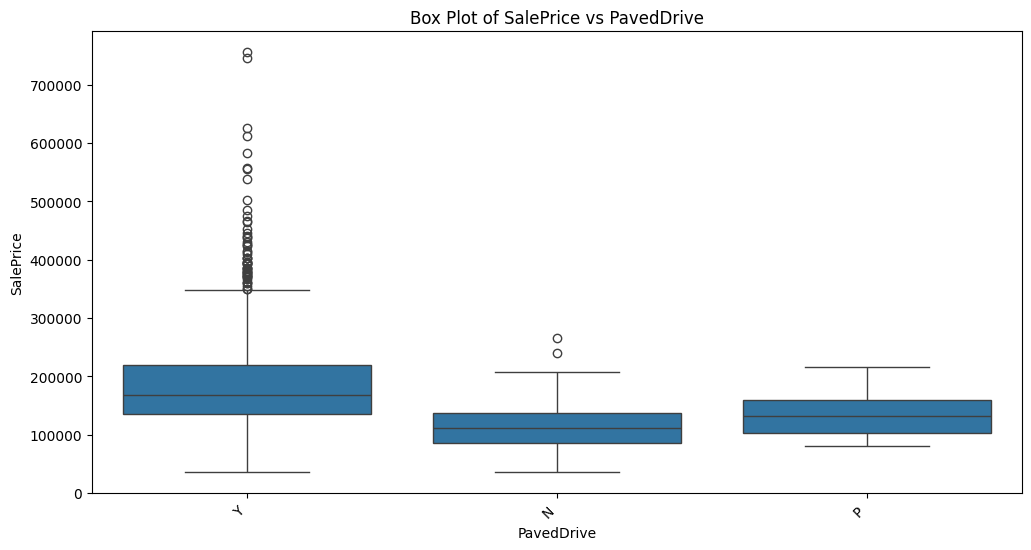

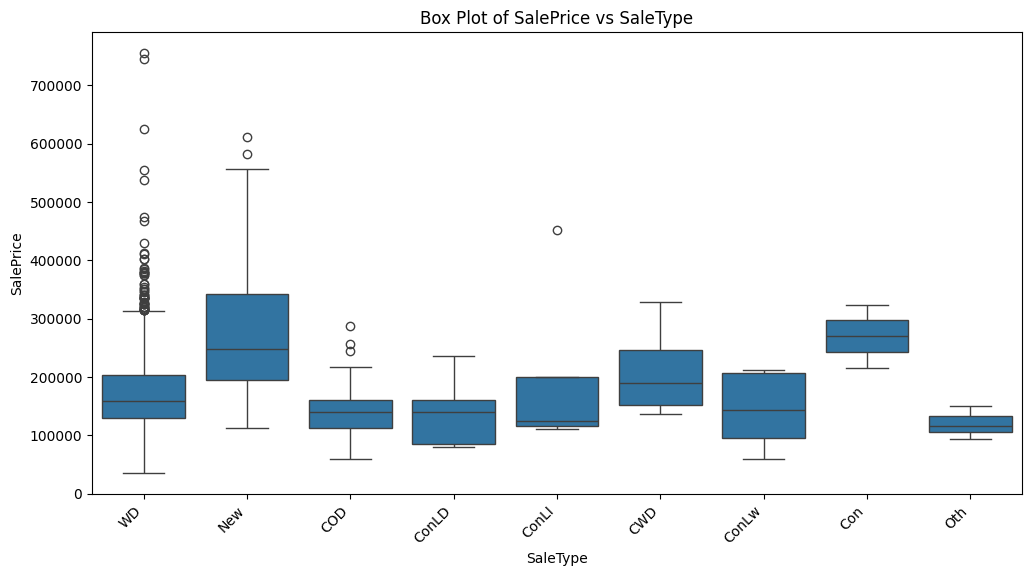

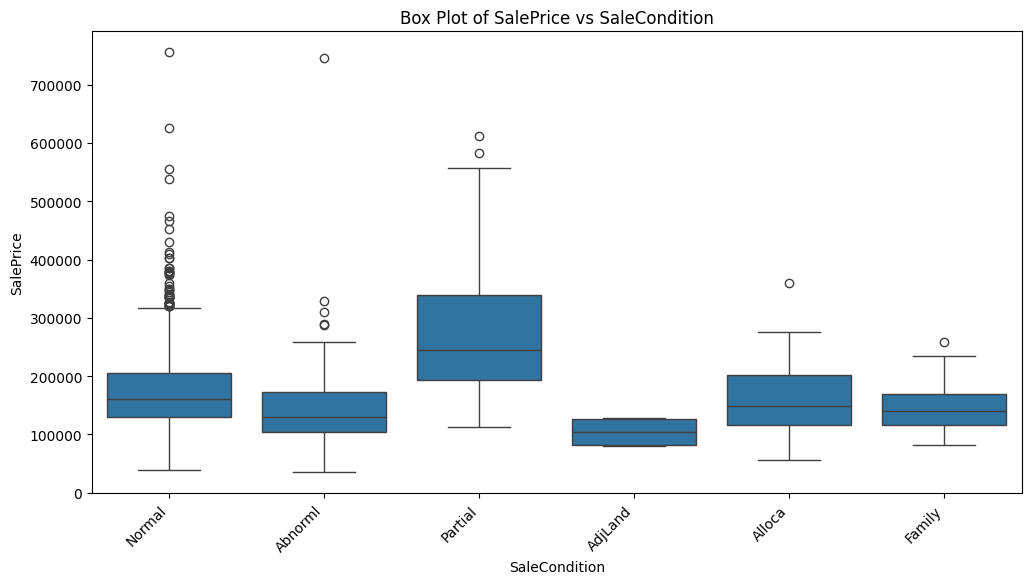

In [168]:
# Box Plot to verify the significance of the categorical variables on the target (if the median and quartiles across different categories differ with respect to target it is consider to be significant)

for column,_ in significant_columns:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=column, y='SalePrice', data=final_df)
  plt.title(f'Box Plot of SalePrice vs {column}')
  plt.xticks(rotation=45, ha='right')
  plt.show()


In [169]:
# Dropping all insignificant categorical columns

significant_categorical_columns = [col for col, _ in significant_columns]
categorical_columns_to_drop = [col for col in final_df.select_dtypes(include='object').columns if col not in significant_categorical_columns]
final_df = final_df.drop(columns=categorical_columns_to_drop)


In [170]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [171]:
# convert the categorical columns into one hot vectors except these below columns convert these below columns into ordinal encoding from 0 to k - 1 categories in that specific column
# ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual Functional FireplaceQu GarageFinish GarageQual GarageCond PavedDrive these columns
# contains ordinal values for which ordinal encoding (0 to k - 1) is better and one hot is not considered in this case other categorical columns are encoded using one hot encoding

from sklearn.preprocessing import OrdinalEncoder

# List of columns to be ordinally encoded
ordinal_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'PavedDrive']

# List of columns to be one-hot encoded
one_hot_columns = [col for col in final_df.select_dtypes(include='object').columns if col not in ordinal_columns]

# Create a dictionary to map quality ratings to numerical values
quality_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,
    'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4,
    'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6,
    'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1,
    'Fin': 3, 'RFn': 2, 'Unf': 1,
    'Y': 2, 'P': 1, 'N': 0
}

# Apply ordinal encoding to specified columns
for column in ordinal_columns:
  if column in final_df.columns:
    if final_df[column].dtype == 'object':
      # Replace NaN values with 'NA' for consistency in mapping
      final_df[column].fillna('NA', inplace=True)
      # Map quality ratings to numerical values
      final_df[column] = final_df[column].map(lambda x: quality_mapping.get(x, 0))

# Apply one-hot encoding to remaining categorical columns
final_df = pd.get_dummies(final_df, columns=one_hot_columns, dummy_na=True)

final_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,False,True,False,False,False,False,False,True,False,False
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,False,True,False,False,False,False,False,True,False,False
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,False,True,False,False,False,False,False,True,False,False
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,False,True,False,True,False,False,False,False,False,False
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,False,True,False,False,False,False,False,True,False,False


In [172]:
final_df['BsmtFinType1'].unique()

array([6, 5, 1, 3, 4, 0, 2])

In [173]:
# calculate p values of all numerical columns using pearsons correlation coefficient against target column SalePrice and drop columns having p-values greater than 0.05

from scipy.stats import pearsonr

numerical_cols = final_df.select_dtypes(include=np.number).drop('SalePrice', axis=1).columns

p_values = []
for col in numerical_cols:
  correlation, p_value = pearsonr(final_df[col], final_df['SalePrice'])
  p_values.append((col, p_value))

cols_to_drop = [col for col, p_val in p_values if p_val > 0.05]

final_df = final_df.drop(columns=cols_to_drop)
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.944591,...,False,True,False,False,False,False,False,True,False,False
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.641228,...,False,True,False,False,False,False,False,True,False,False
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.301643,...,False,True,False,False,False,False,False,True,False,False
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.061670,...,False,True,False,True,False,False,False,False,False,False
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.174865,...,False,True,False,False,False,False,False,True,False,False


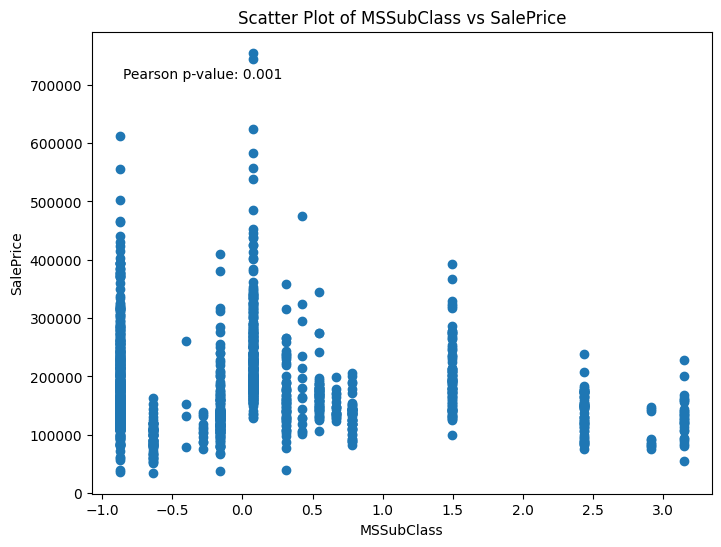

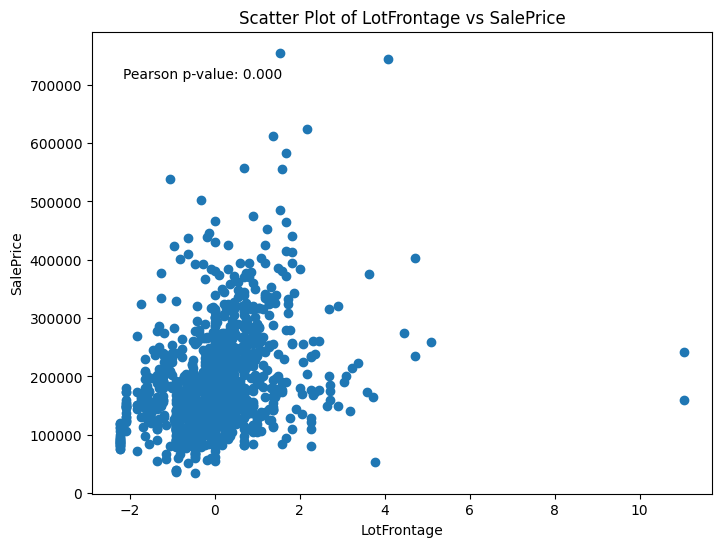

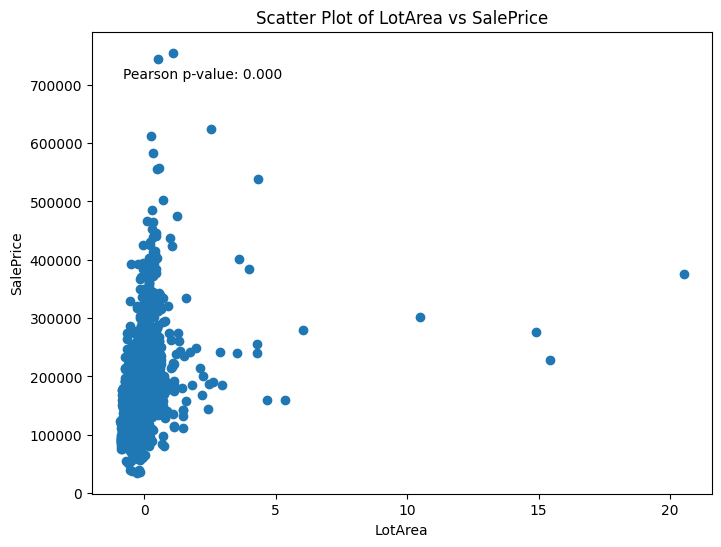

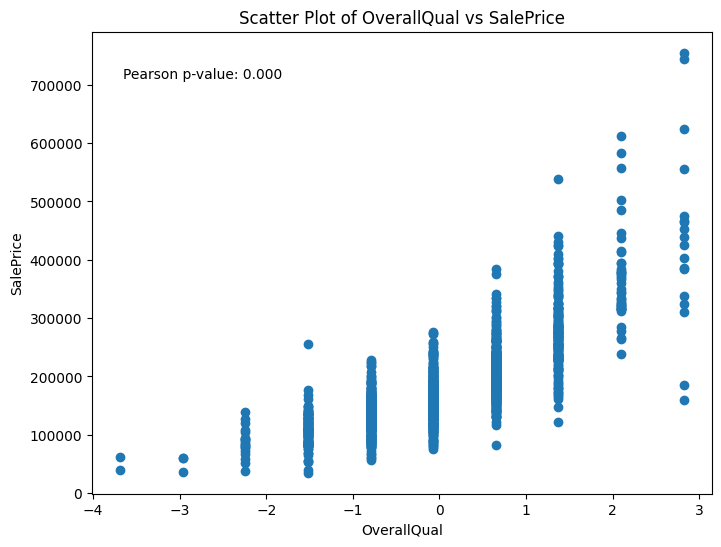

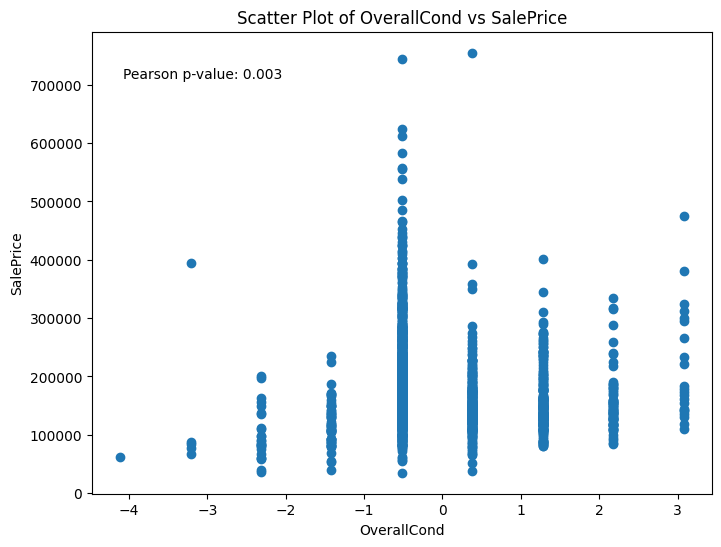

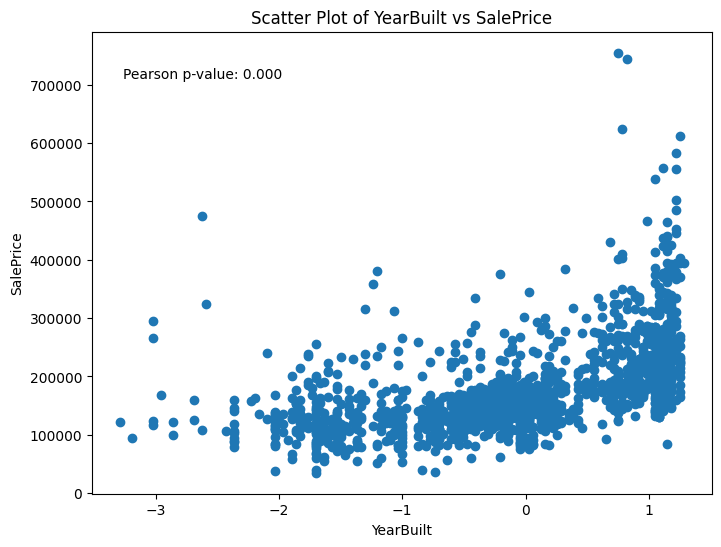

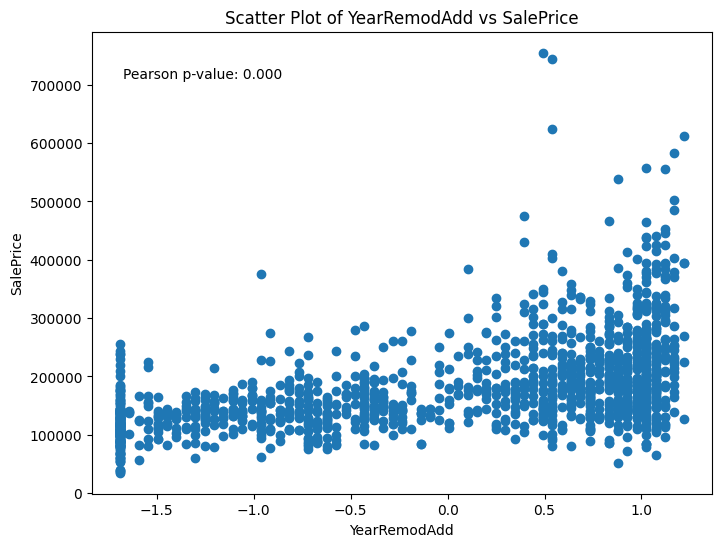

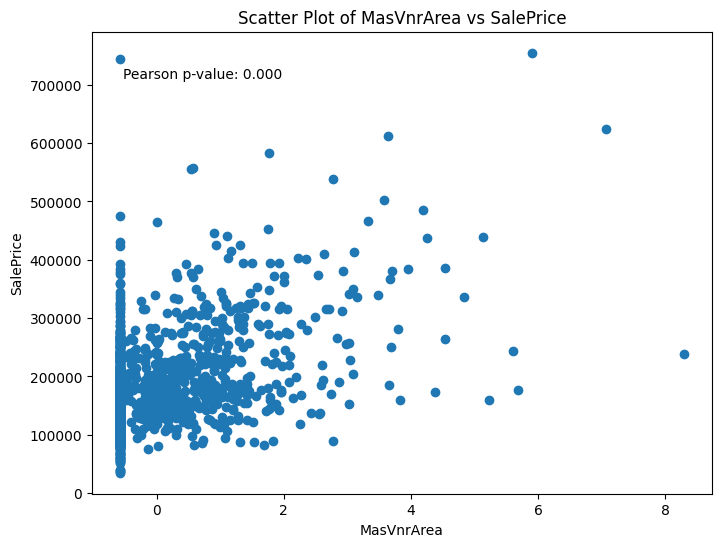

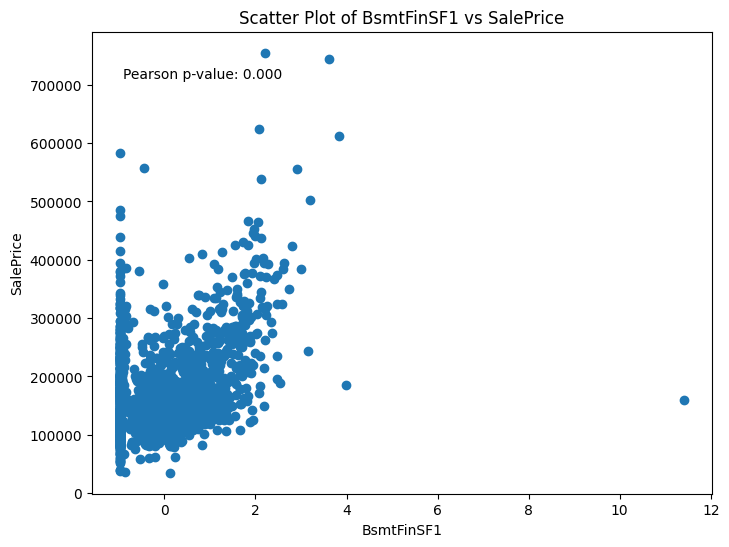

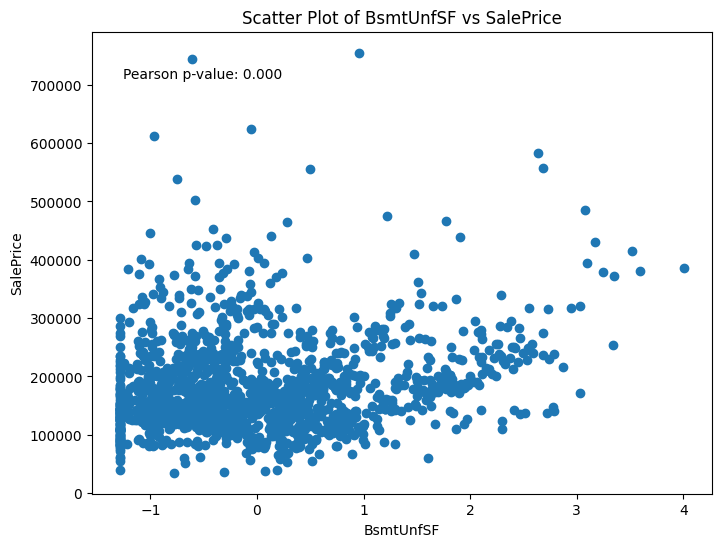

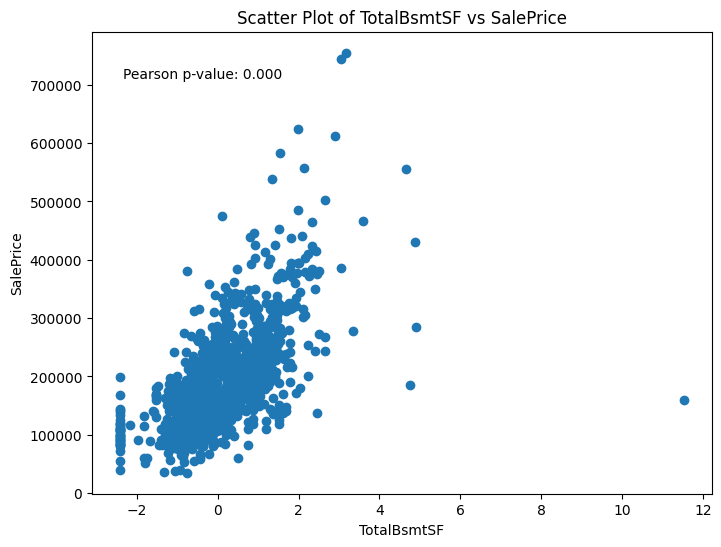

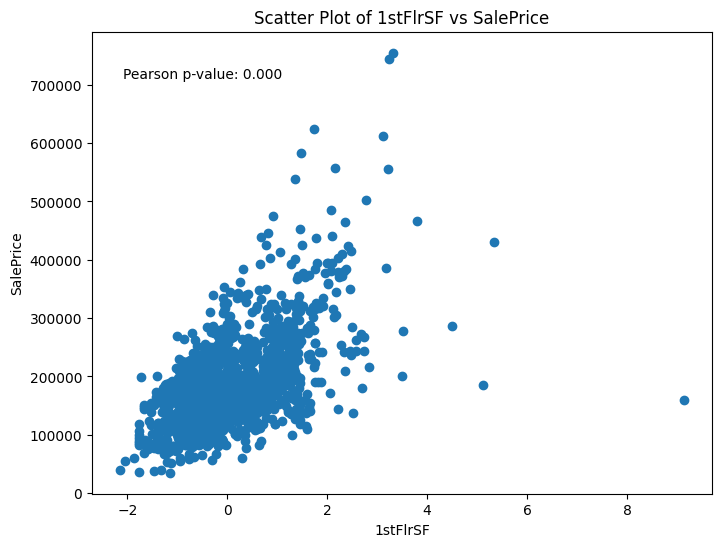

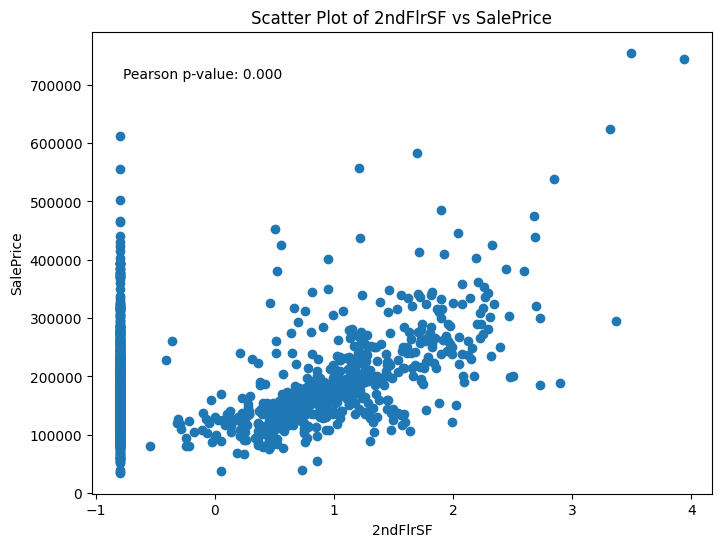

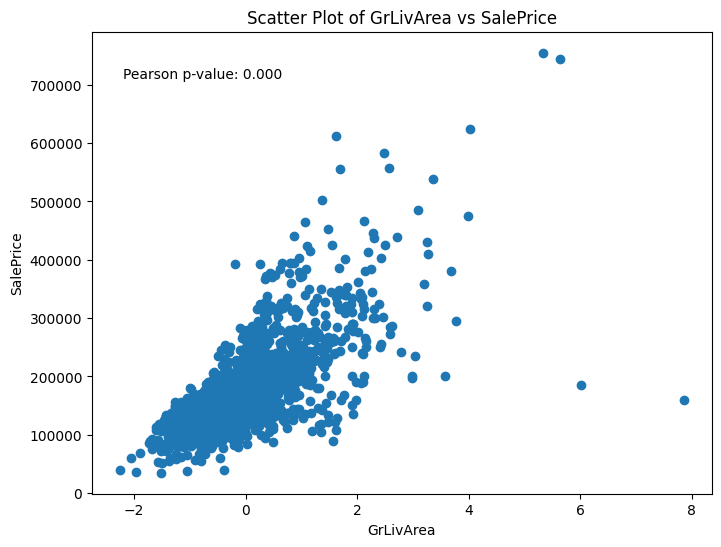

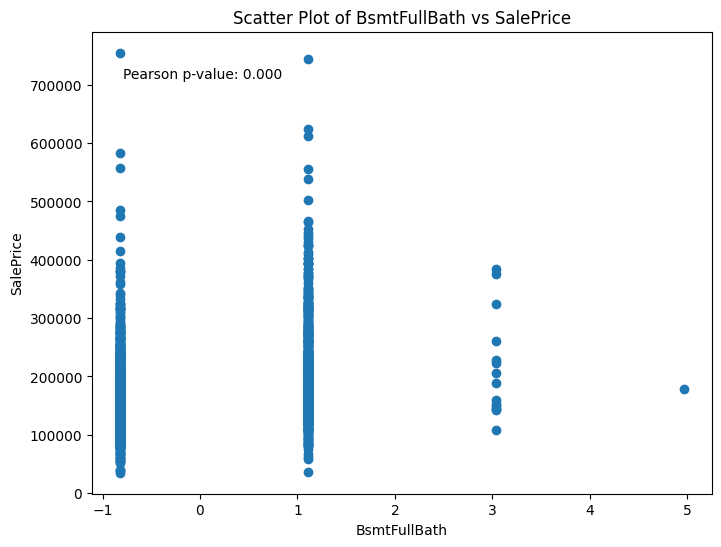

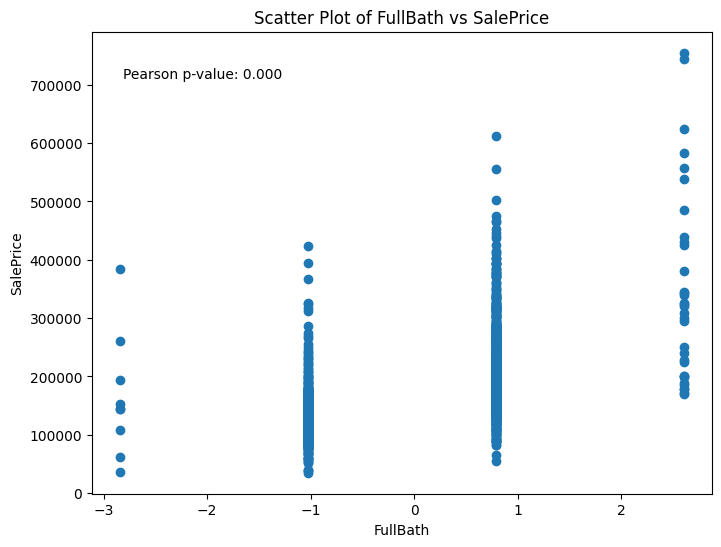

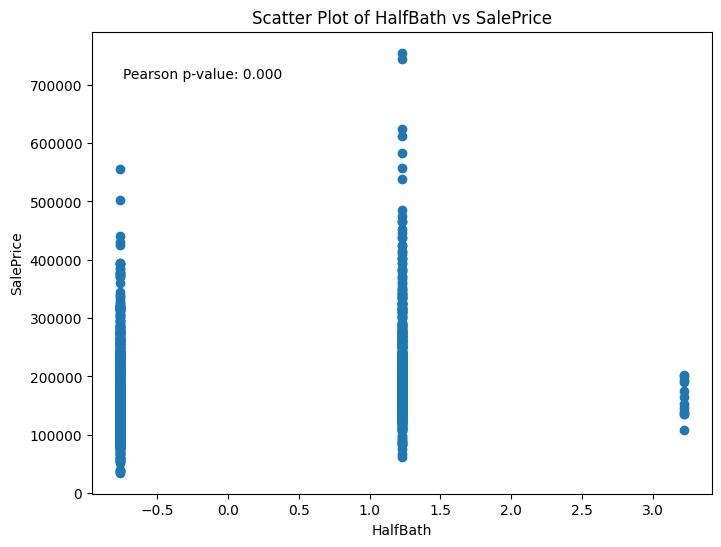

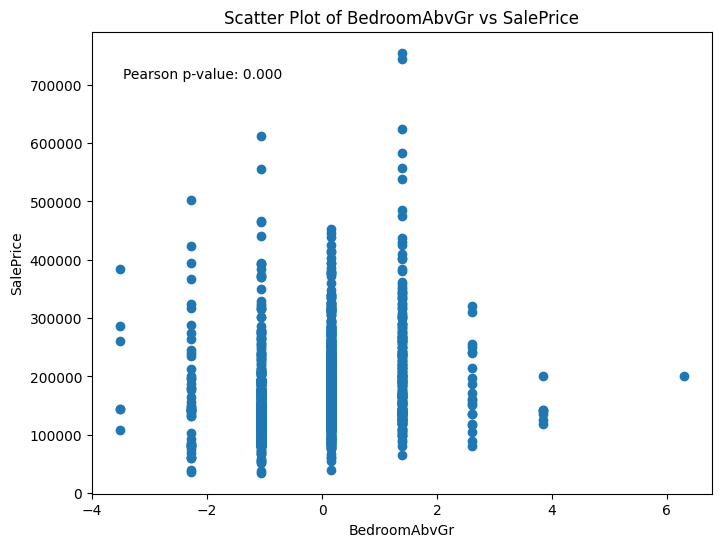

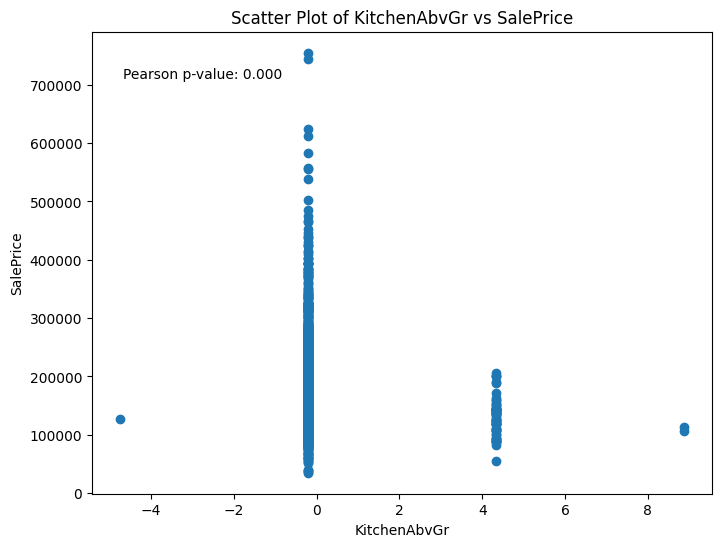

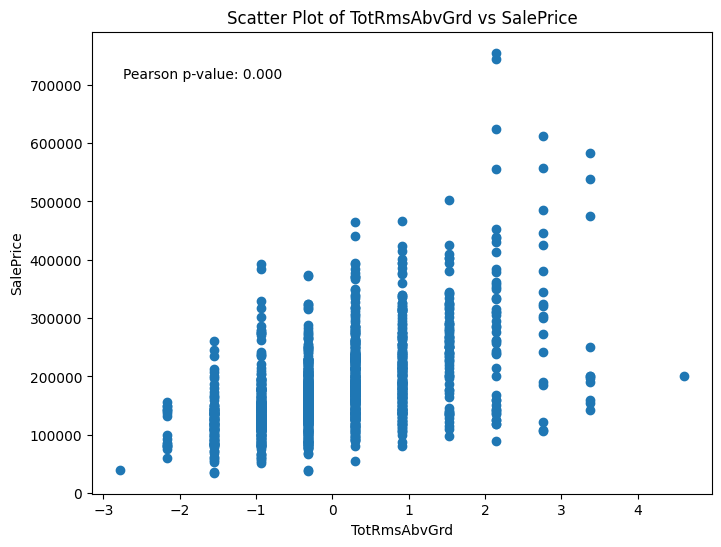

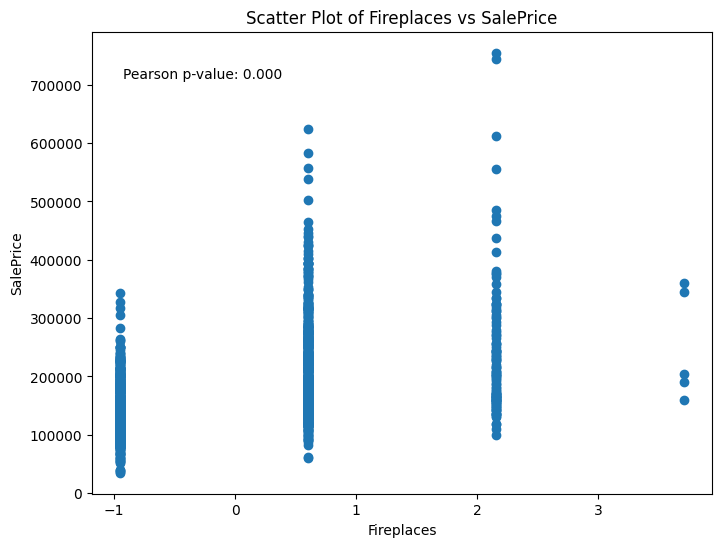

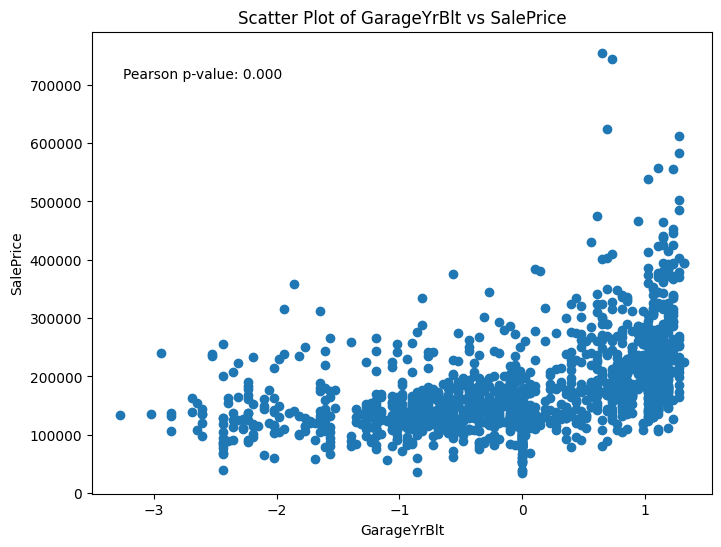

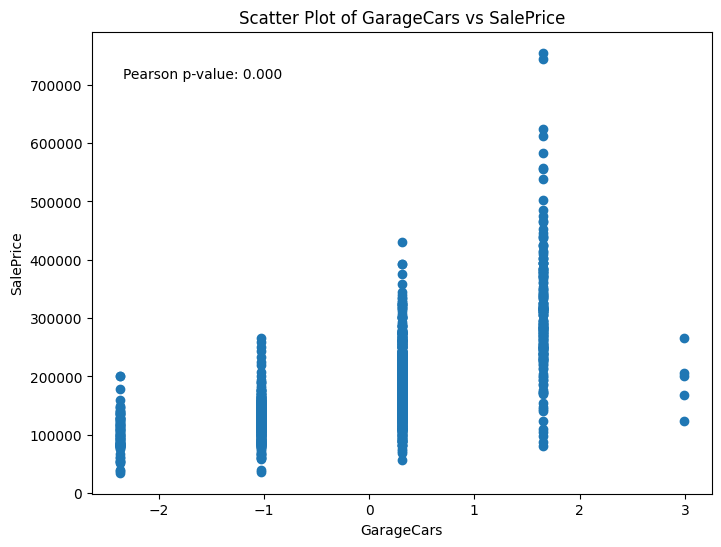

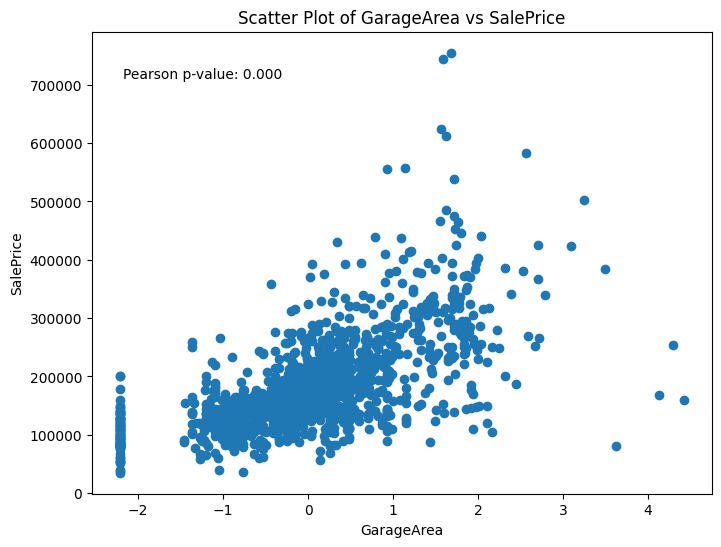

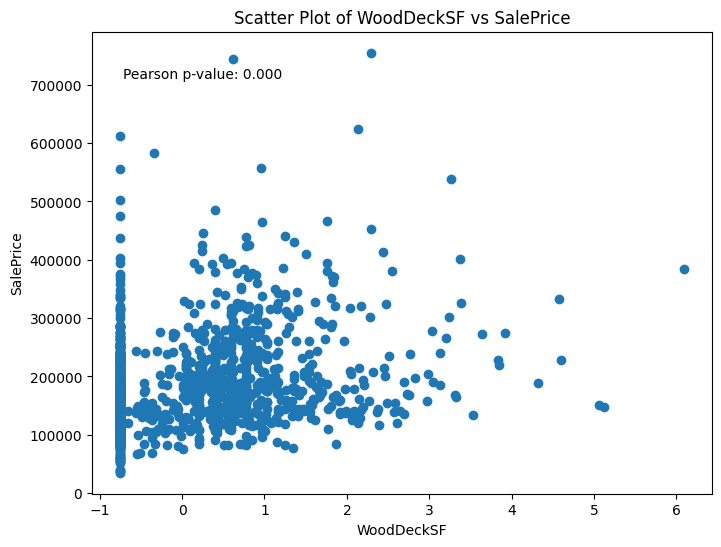

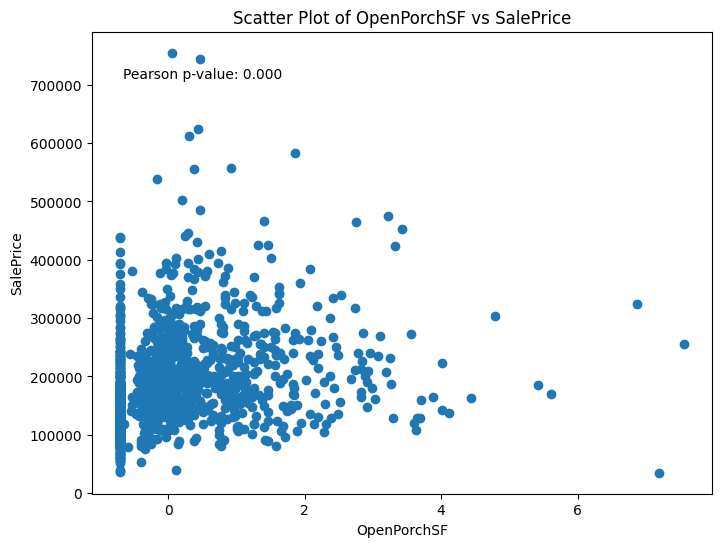

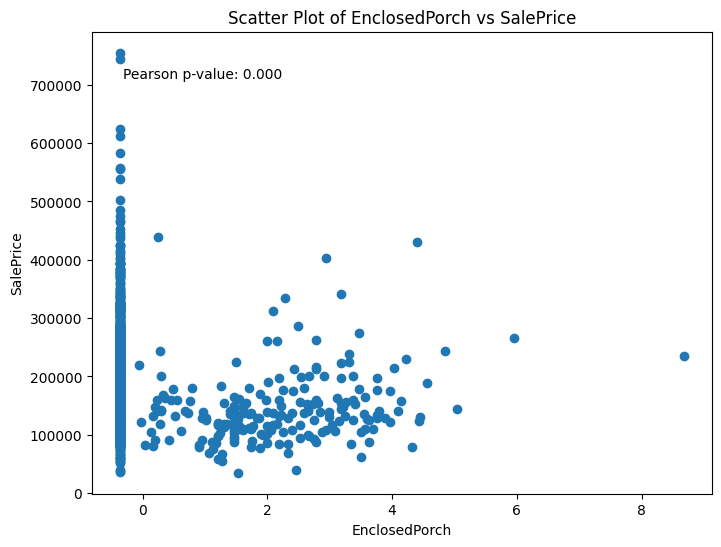

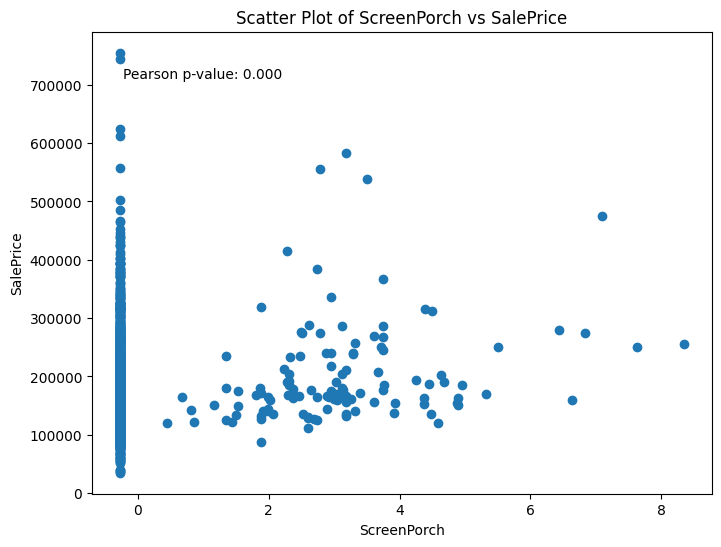

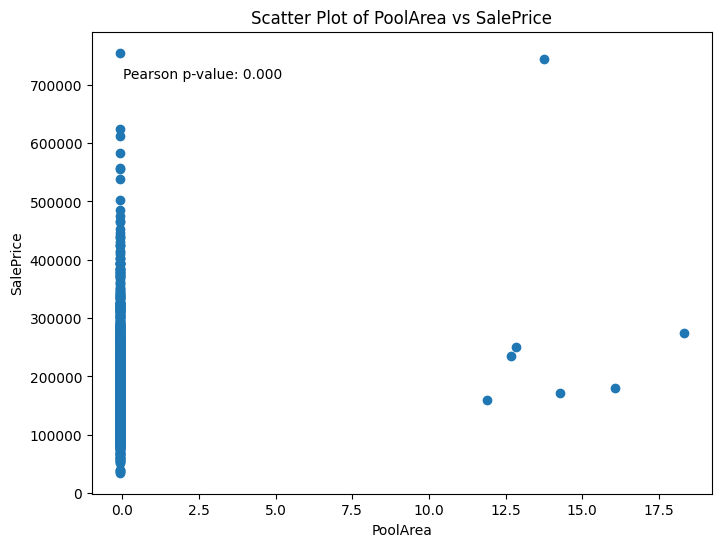

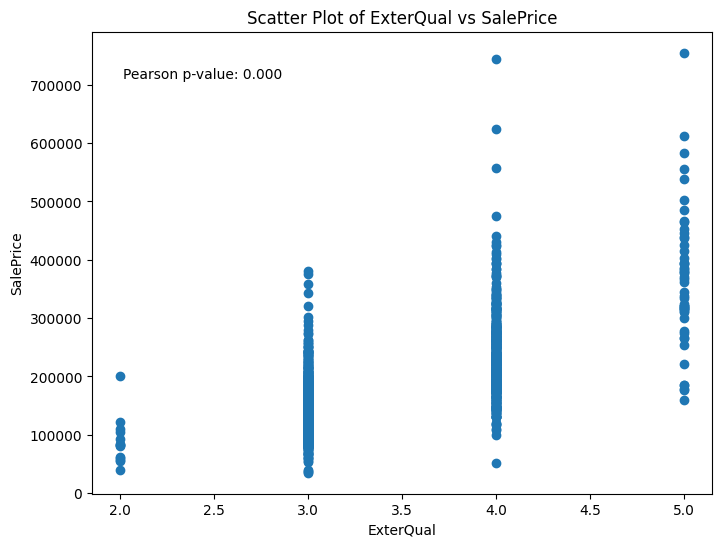

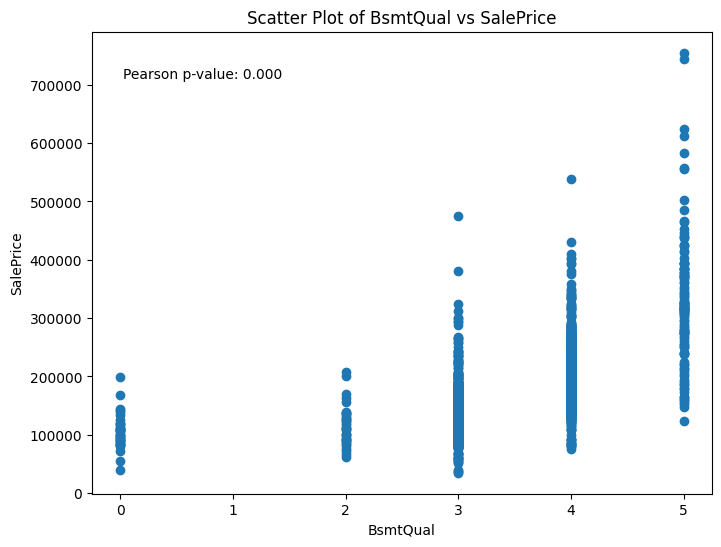

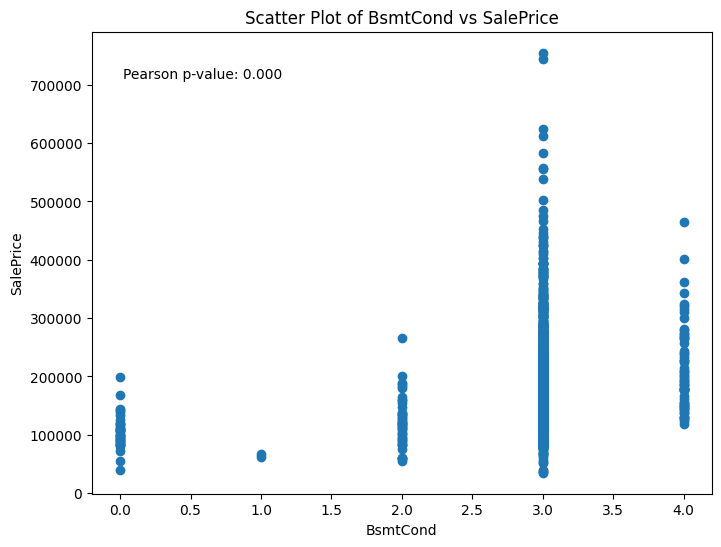

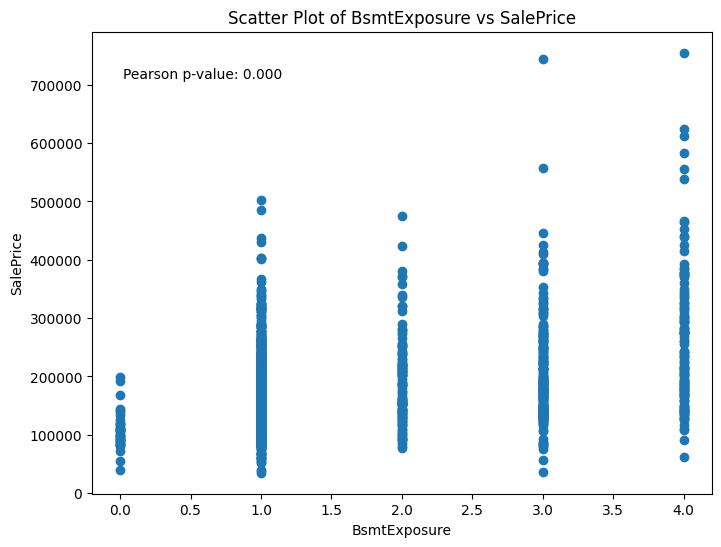

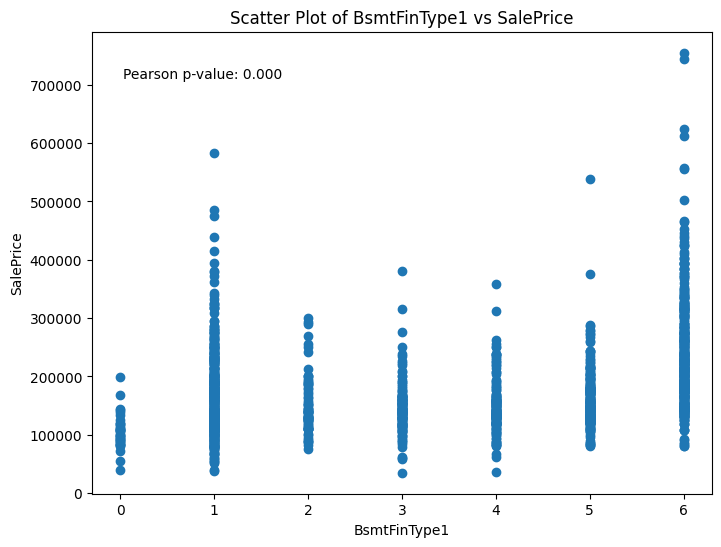

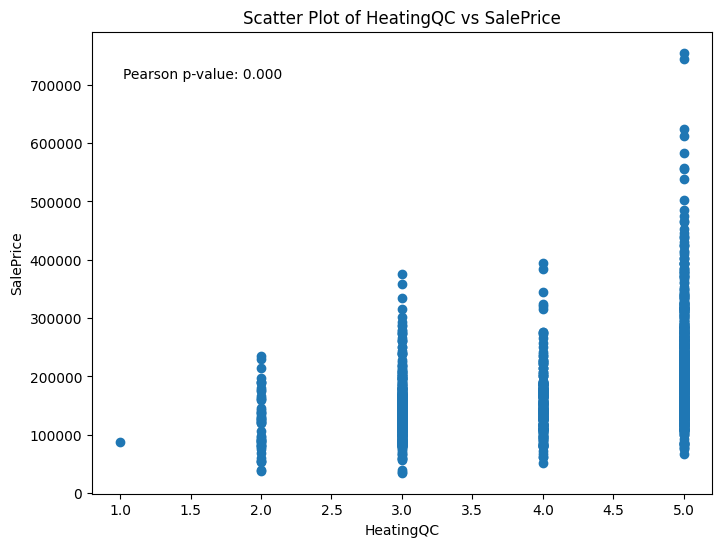

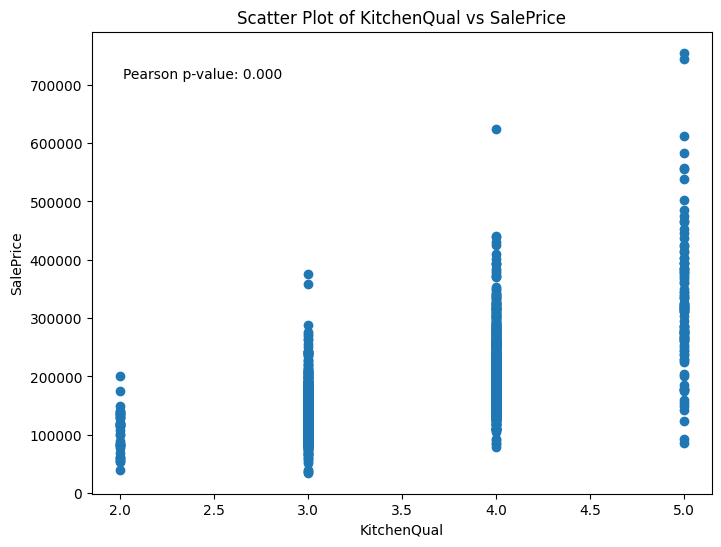

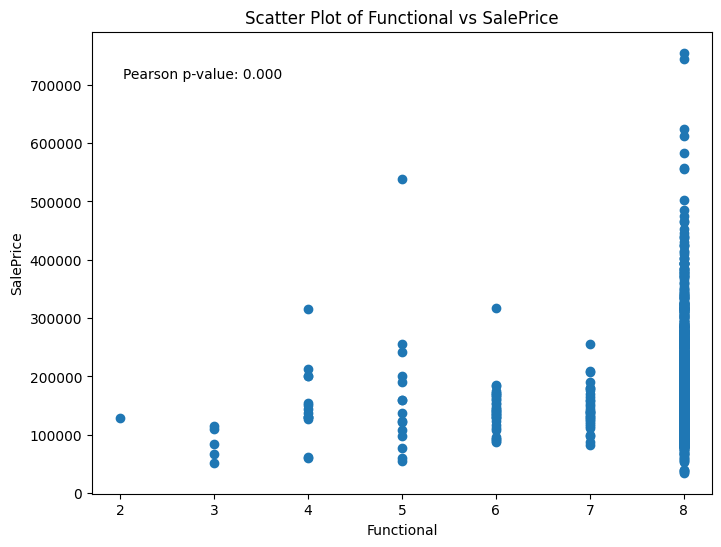

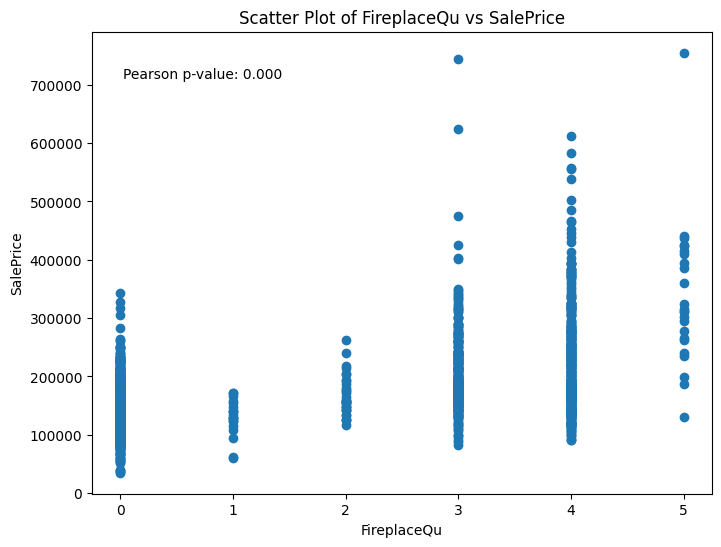

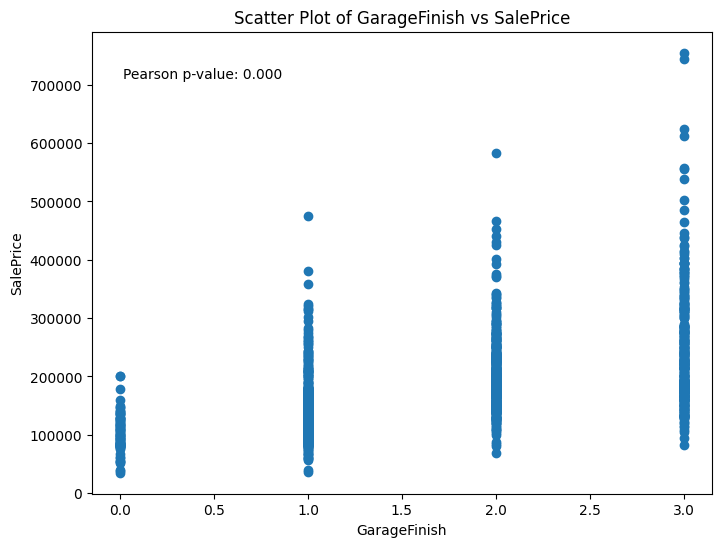

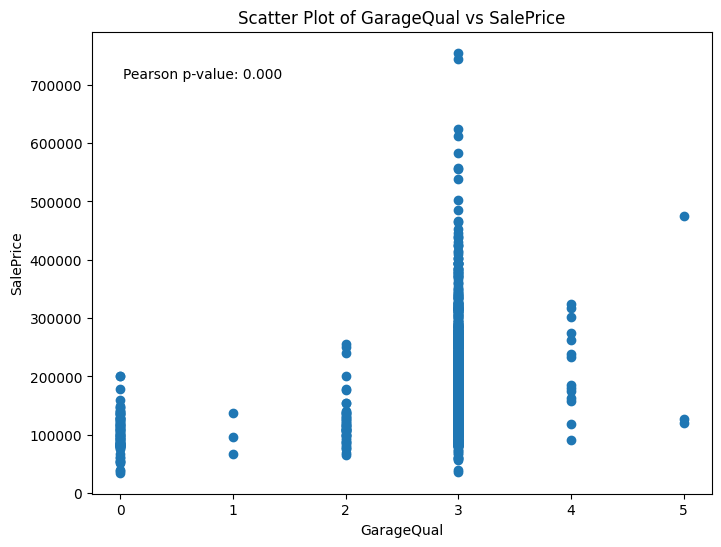

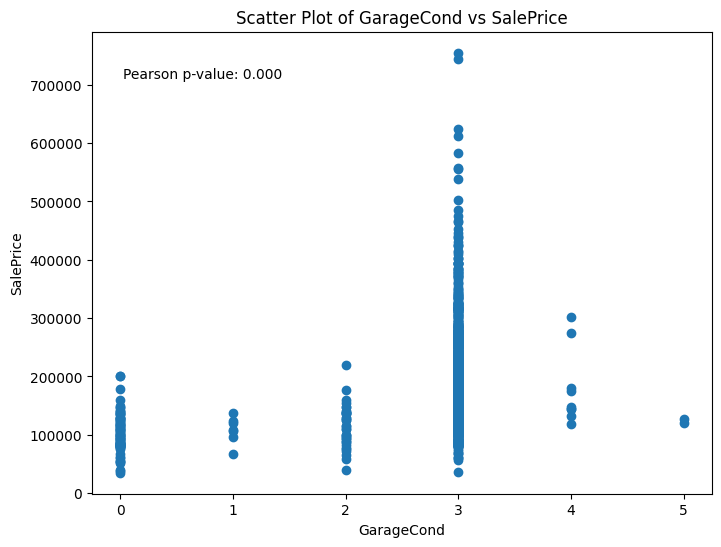

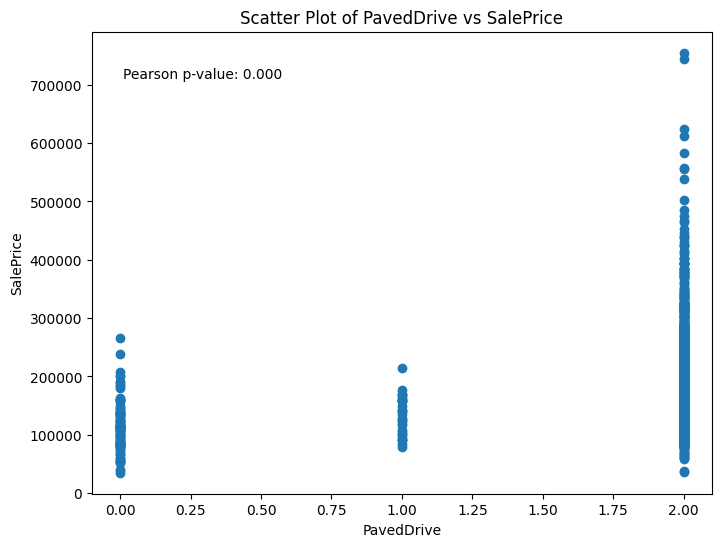

In [174]:
# prompt: plot scatter plots of all numerical features vs target with their respective pearsons p - values

import matplotlib.pyplot as plt
from scipy.stats import pearsonr

numerical_features = final_df.select_dtypes(include=np.number).drop('SalePrice', axis=1)

for column in numerical_features.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(final_df[column], final_df['SalePrice'])
  plt.xlabel(column)
  plt.ylabel('SalePrice')
  plt.title(f'Scatter Plot of {column} vs SalePrice')

  # Calculate Pearson correlation and p-value
  correlation, p_value = pearsonr(final_df[column], final_df['SalePrice'])

  # Display p-value on the plot
  plt.text(0.05, 0.9, f'Pearson p-value: {p_value:.3f}', transform=plt.gca().transAxes)

  plt.show()


In [ ]:
# transform some features by log or polynomial transformation and see if there is any correlation between the target and the features
# and then after transforming train a multiple polynomial regression model and check for mse and then feature engineer further by lasso or by checking p-values
# check last two prompts